# i. Perkenalan

<b>

==============================

Nama: Muhammad Iqbal Saputra

Batch: RMT-032

Program ini dibuat untuk memprediksi default payment next month berdasarkan fitur-fitur yang terdapat dari dataset ml_datasets dari database credit_card_default pada public data bigquery.

==============================


# ii. Query SQL

**Informasi mengenai dataset**
| Nama Kolom                   | Deskripsi                                                                                  |
|------------------------------|--------------------------------------------------------------------------------------------|
| `limit_balance`              | Batas maksimum saldo kredit yang dapat digunakan oleh pelanggan.                            |
| `sex`                        | Jenis kelamin pelanggan (1: Laki-laki, 2: Perempuan).                                       |
| `education_level`            | Tingkat pendidikan pelanggan (1: Sekolah Menengah, 2: Sarjana, 3: Magister, 4: Doktor, dll.).|
| `marital_status`             | Status pernikahan pelanggan (1: Menikah, 2: Lajang, 3: Lainnya).                            |
| `age`                        | Usia pelanggan.                                                                             |
| `pay_0`                      | Status pembayaran bulan terakhir (0: Tepat waktu, 1-9: Keterlambatan pembayaran dalam bulan).|
| `pay_2`                      | Status pembayaran dua bulan lalu.                                                           |
| `pay_3`                      | Status pembayaran tiga bulan lalu.                                                          |
| `pay_4`                      | Status pembayaran empat bulan lalu.                                                         |
| `pay_5`                      | Status pembayaran lima bulan lalu.                                                          |
| `pay_6`                      | Status pembayaran enam bulan lalu.                                                          |
| `bill_amt_1`                 | Jumlah tagihan bulan terakhir.                                                              |
| `bill_amt_2`                 | Jumlah tagihan dua bulan lalu.                                                              |
| `bill_amt_3`                 | Jumlah tagihan tiga bulan lalu.                                                             |
| `bill_amt_4`                 | Jumlah tagihan empat bulan lalu.                                                            |
| `bill_amt_5`                 | Jumlah tagihan lima bulan lalu.                                                             |
| `bill_amt_6`                 | Jumlah tagihan enam bulan lalu.                                                             |
| `pay_amt_1`                  | Jumlah pembayaran bulan terakhir.                                                           |
| `pay_amt_2`                  | Jumlah pembayaran dua bulan lalu.                                                           |
| `pay_amt_3`                  | Jumlah pembayaran tiga bulan lalu.                                                          |
| `pay_amt_4`                  | Jumlah pembayaran empat bulan lalu.                                                         |
| `pay_amt_5`                  | Jumlah pembayaran lima bulan lalu.                                                          |
| `pay_amt_6`                  | Jumlah pembayaran enam bulan lalu.                                                          |
| `default_payment_next_month` | Status default pembayaran pada bulan berikutnya (1: Gagal bayar, 0: Tidak gagal bayar).     |


**Query untuk mengambil data pada BigQuery**

```sql
SELECT 
  SAFE_CAST(limit_balance AS FLOAT64) AS limit_balance,
  SAFE_CAST(SPLIT(SAFE_CAST(sex AS STRING), '_')[OFFSET(0)] AS INT64) AS sex,
  SAFE_CAST(SPLIT(SAFE_CAST(education_level AS STRING), '_')[OFFSET(0)] AS INT64) AS education_level,
  SAFE_CAST(SPLIT(SAFE_CAST(marital_status AS STRING), '_')[OFFSET(0)] AS INT64) AS marital_status,
  SAFE_CAST(age AS INT64) AS age,
  SAFE_CAST(pay_0 AS FLOAT64) AS pay_0,
  SAFE_CAST(pay_2 AS FLOAT64) AS pay_2,
  SAFE_CAST(pay_3 AS FLOAT64) AS pay_3,
  SAFE_CAST(pay_4 AS FLOAT64) AS pay_4,
  SAFE_CAST(SPLIT(SAFE_CAST(pay_5 AS STRING), '_')[OFFSET(0)] AS FLOAT64) AS pay_5,
  SAFE_CAST(SPLIT(SAFE_CAST(pay_6 AS STRING), '_')[OFFSET(0)] AS FLOAT64) AS pay_6,
  SAFE_CAST(bill_amt_1 AS FLOAT64) AS bill_amt_1,
  SAFE_CAST(bill_amt_2 AS FLOAT64) AS bill_amt_2,
  SAFE_CAST(bill_amt_3 AS FLOAT64) AS bill_amt_3,
  SAFE_CAST(bill_amt_4 AS FLOAT64) AS bill_amt_4,
  SAFE_CAST(bill_amt_5 AS FLOAT64) AS bill_amt_5,
  SAFE_CAST(bill_amt_6 AS FLOAT64) AS bill_amt_6,
  SAFE_CAST(pay_amt_1 AS FLOAT64) AS pay_amt_1,
  SAFE_CAST(pay_amt_2 AS FLOAT64) AS pay_amt_2,
  SAFE_CAST(pay_amt_3 AS FLOAT64) AS pay_amt_3,
  SAFE_CAST(pay_amt_4 AS FLOAT64) AS pay_amt_4,
  SAFE_CAST(SPLIT(SAFE_CAST(pay_amt_5 AS STRING), '_')[OFFSET(0)] AS FLOAT64) AS pay_amt_5,
  SAFE_CAST(SPLIT(SAFE_CAST(pay_amt_6 AS STRING), '_')[OFFSET(0)] AS FLOAT64) AS pay_amt_6,
  SAFE_CAST(SPLIT(SAFE_CAST(default_payment_next_month AS STRING), '_')[OFFSET(0)] AS INT64) AS default_payment_next_month
FROM 
  `bigquery-public-data.ml_datasets.credit_card_default`
limit 64000 -- RMT-032 x 2000 = 64.000

# iii. Import Libraries

In [1]:
%pip install feature-engine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries untuk Data Manipulation
import pandas as pd
import numpy as np

# Libraries untuk Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries untuk Statistics
from scipy import stats
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform

# Libraries untuk Modeling ML
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, roc_auc_score,mean_squared_error, root_mean_squared_error, r2_score, accuracy_score , classification_report , confusion_matrix,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import uniform, randint
from sklearn.metrics.pairwise import manhattan_distances

# Library pipelines
from sklearn.pipeline import Pipeline

# Model Saving
import pickle
import json
import joblib

# Libraries untuk mengabaikan semua warning
import warnings

In [3]:
# Kode untuk mengabaikan semua warning
warnings.filterwarnings("ignore")

**Penjelasan**  
Code di atas digunakan untuk meng-*import libraries* sebagai *tools* untuk membantu dalam coding python untuk analisa,manipulasi data, visualisasi data, membuat model, men-*train* model, dan mengetes model, serta mengimpor file hasil dari prediksi model, sesuai dengan tujuan penggunaan yang sudah ditulis dalam *comment* pada bagian atas masing-masing kode.

# iv. Data Loading

Sebelum melakukan data analysis dan pembuatan model, kita akan mengakses dan membuka dataset dari file yang telah di proses menggunakan query dan di unduh dalam bentuk file .csv ke dalam notebook.

In [4]:
# Membaca CSV
df = pd.read_csv('P1G5_Set_1_iqbal_saputra.csv')

In [5]:
# Menampilkan 10 data pertama
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


In [6]:
# Menampilkan 10 data terakhir
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000.0,2,3,2,28,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [7]:
# Mengcopy data
data = df.copy()

In [8]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   int64  
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

- Terdapat total ```2965 entry(row) data dengan 23 kolom data```  

- 2 tipe data digunakan di keseluruhan kolom, yaitu Float di 19 kolom, dan Int di 5 kolom   

- Tidak Terdapat ```null values dalam data```  

In [9]:
# Cek kolom dataset
data.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

**Penjelasan**  
Dengan menggunakan library pandas method .columns kita bisa ```melihat semua nama-nama kolom``` yang sebelumnya tidak bisa terlihat keseluruhan untuk bisa dianalisa lebih lanjut berdasarkan konteks nama kolom dan gambaran isinya terhadap goals objective kita, yaitu memprediksi harga.

Selanjutnya, kita akan melakukan pengecekan missing value.

In [10]:
# Cek missing value pada dataset
missing_values = data.isnull().sum()
kolom_missing_values = missing_values[missing_values > 0]
print('Kolom dengan missing value: ', kolom_missing_values)

Kolom dengan missing value:  Series([], dtype: int64)


```tidak ada missing values```

In [11]:
# Cek apakah ada data yang duplikat
data.duplicated().sum()

1

```terdapat 1 data duplikat```

In [12]:
# Drop data duplikat
data.drop_duplicates(inplace=True)

In [13]:
# Cross check data duplikat
data.duplicated().sum()

0

```data duplikat sudah di handle```

# v. Exploratory Data Analysis (EDA)

Tujuan EDA adalah untuk mendapat gambaran dataset dan melihat kasar korelasi dari tiap kolom terkait objective proyek yaitu 

## Deskriptif Statistik Data

In [14]:
# Deskriptif statistik kolom numerik
data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


---
**Penjelasan**  
Setelah melakukan data describe kita dapat mendapatkan informasi terkait count, mean, standard deviasi, min, max, q1, q2, q3 dari setiap kolom berisi data numerikal. Berikut penemuan singkat yang didapatkan:

- Nilai std dari kolom-kolom cukup besar, artinya rentang antar value data besar ```menandakan adanya outlier di banyak kolom.``` 
- Nilai min dan max di kolom Price cukup jauh, dan terdapat perbedaan dari mean dan median menandakan ```adanya outlier di kolom target.```

setelah melakukan pengecekan statistik deskriptif kolom numerikal, selanjutnya kolom kategorikal.

## Data Skewness and Kurtosis

In [15]:
# Skewness analisis
skewness = data.skew()
kurtosis = data.kurtosis()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: limit_balance                  1.000605
sex                           -0.441056
education_level                0.899600
marital_status                -0.020784
age                            0.772632
pay_0                          0.927672
pay_2                          0.862469
pay_3                          0.932184
pay_4                          1.102317
pay_5                          1.060916
pay_6                          0.979319
bill_amt_1                     2.484229
bill_amt_2                     2.457971
bill_amt_3                     2.569559
bill_amt_4                     2.447792
bill_amt_5                     2.399944
bill_amt_6                     2.432000
pay_amt_1                     11.875903
pay_amt_2                     29.399792
pay_amt_3                      8.043463
pay_amt_4                      8.450288
pay_amt_5                     11.467169
pay_amt_6                      9.758714
default_payment_next_month     1.393676
dtype: float64
Kurtosis: limit

---
**Penjelasan**  
Berdasarkan analisa skewness, hasil menunjukkan angka 1,393. Maka dapat diinterpretasikan bahwa:

- ```Data masuk ke dalam kategori slightly skewed``` karena lebih dari 0,5 namun tidak terlalu tinggi nilai skewednessnya.
- Distribusi data cenderung condong ke kanan (positif skewness).
- Dapat ada kehadiran outlier atau nilai ekstrim yang signifikan di sisi kanan distribusi.

Sementara itu nilai kurtosis -0.057 memiliki arti:

- Distribusi data memiliki kurtosis yang lebih tinggi dari distribusi normal (berbentuk leptokurtik/runcing).
- Ada potensi untuk adanya data yang berkumpul dalam kelompok yang lebih kecil, menyebabkan kurtosis yang tinggi.  
---

## Distribution Visualization

<Axes: >

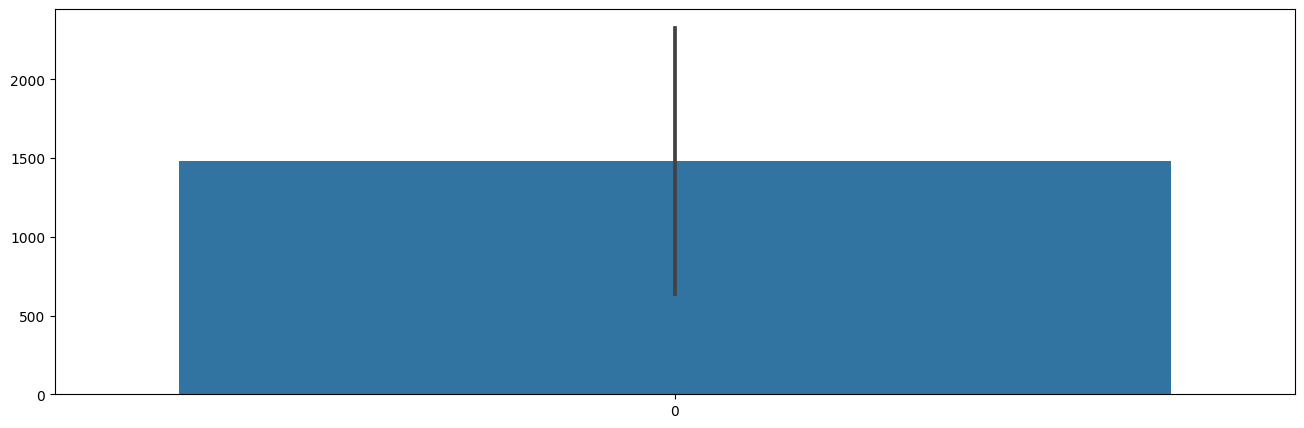

In [16]:
# Membuat histogram
plt.figure(figsize = (16,5))#-> Ukuran Visualisasi
sns.barplot(data['default_payment_next_month'].value_counts())#-> Ketentuan Data 

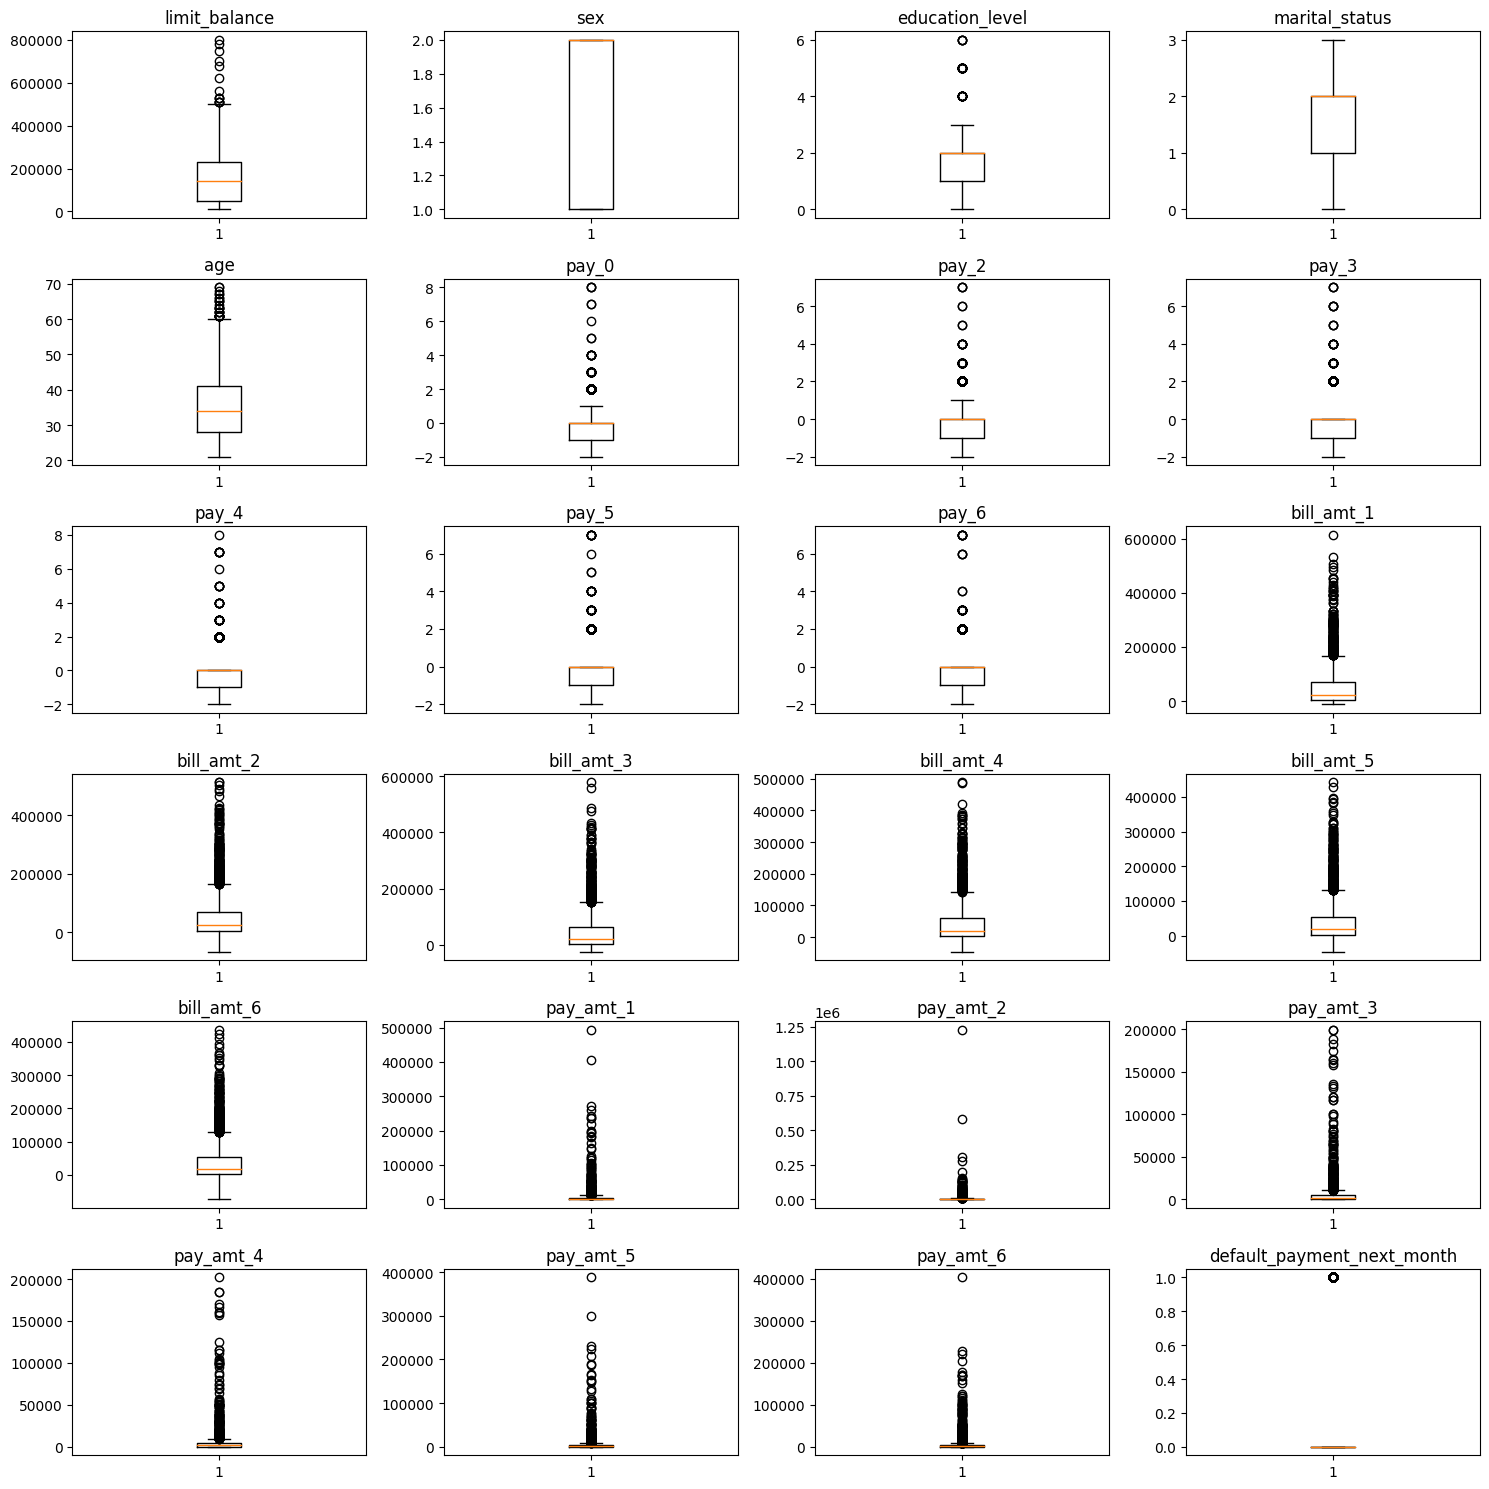

In [17]:
# List kolom
num_col = data.columns
# Plot figure
fig, axes = plt.subplots(6, 4, figsize=(15, 15))
axes = axes.flatten()
# Membuat boxplot
for i, column in enumerate(num_col):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)

# Hapus plot kosong
for j in range(len(num_col), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# Menampilkan plot
plt.show()

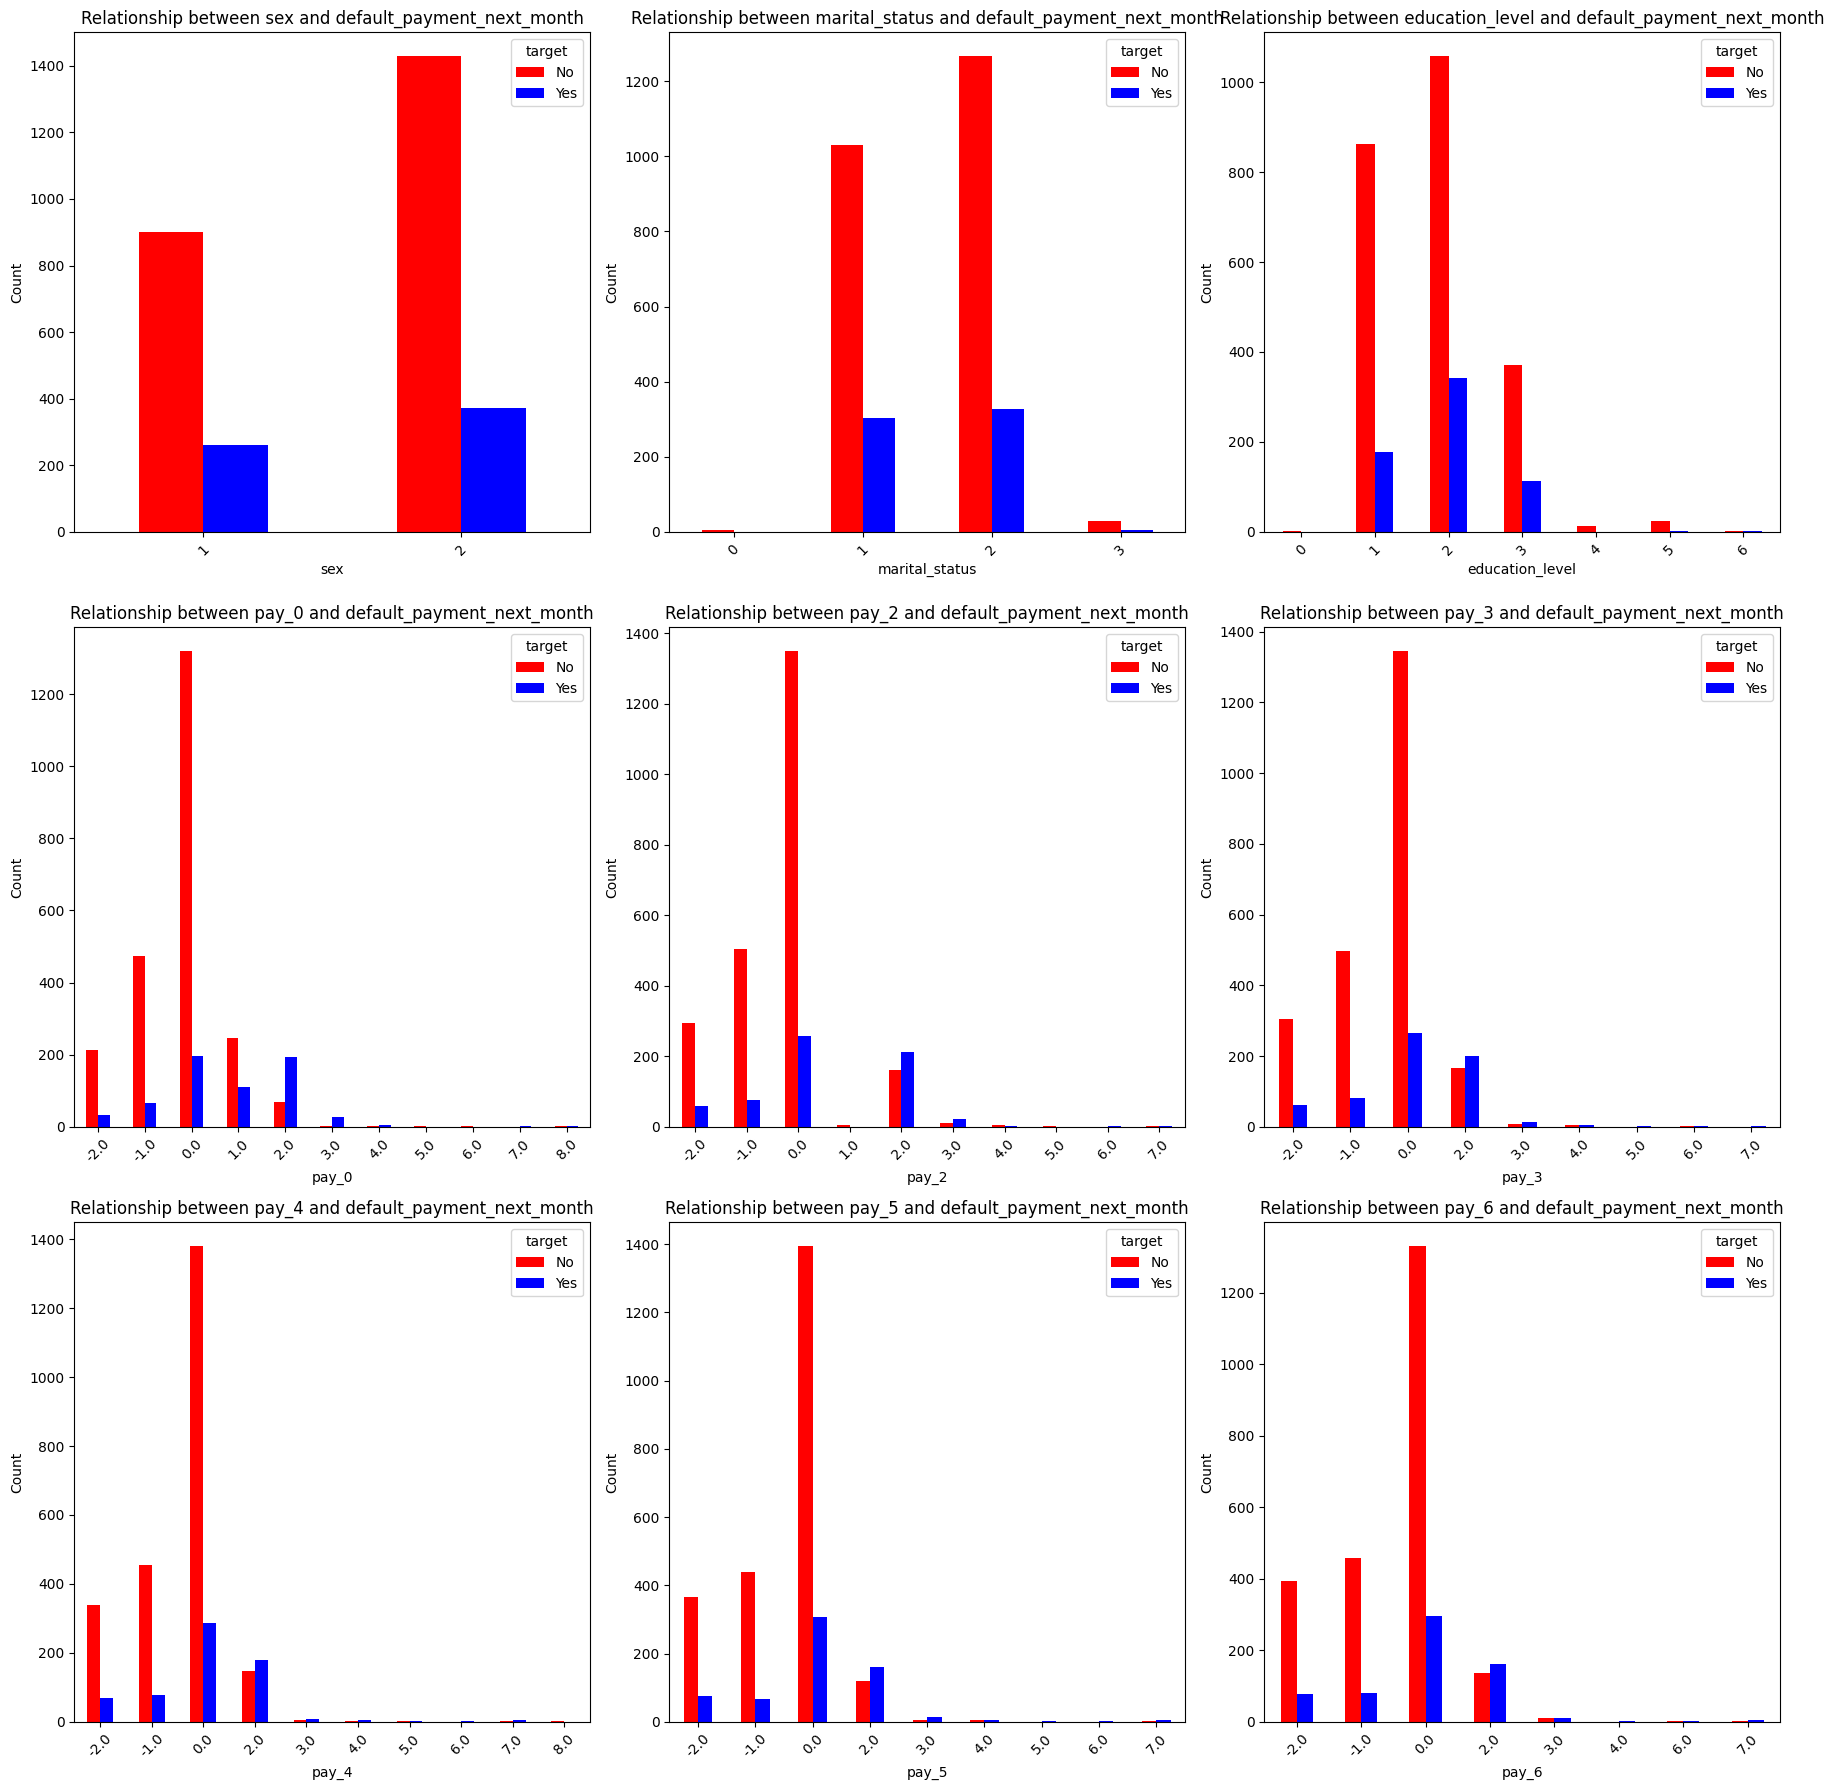

In [18]:
categorical = ['sex', 'marital_status', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Membuat figur dan array sumbu untuk subplots dengan ukuran lebih besar
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Ratakan array sumbu untuk mempermudah iterasi
axes = axes.flatten()

for i, x in enumerate(categorical):
    # Hitung indeks untuk subplot
    row = i // 3
    col = i % 3

    # Crosstab dan plot
    cross_table = pd.crosstab(df[x], df['default_payment_next_month'])
    cross_table.plot(kind='bar', stacked=False, color=['red', 'blue'], ax=axes[i])

    # Menambahkan labels dan title
    axes[i].set_xlabel(x)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f"Relationship between {x} and default_payment_next_month")
    axes[i].legend(title='target', labels=['No', 'Yes'])  # Custom legend labels

    # Rotate x-axis labels biar lebih mudah dibaca
    axes[i].tick_params(axis='x', rotation=45)

# # Sesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show() 


Berdasarkan hasil dari visualisasi hubungan default_payment_next_month dengan seluruh kolom kategori didaptkan :
* `Sex` : Berdarkan sex untuk laki-laki (1) dan perempuan (2) keduanya memiliki jumlah yang akan membayar payment kredit lebih banyak ketimbang yang tidak membayar. Untuk jumlahnya sendiri, perempuan lebih banyak untuk orang yang akan membayar tetapi lebih banyak juga untuk orang tidak membayar ketimbang laki-laki. Dari sini dapat diketahui bahwa jumlah nasabah perempuan lebih banyak dari laki-laki
* `Marital_Status` : Pada marital status terdapat perbedaan jumlah nasabah yang akan memabayar dan akan tidak membayar pada kedua jenis valuenya. Dimana untuk yang sudah menikah (1) dan belum menikah (2) jumlah nasabah yang akan memabayar kredit bulan depan lebih besar ketimbang yang tidak membayar kredit pada bulan depan
* `Education_level` : Pada education level didapatkan sebuah pola dimana jumlah yang membayar ataupun yang tidak membayar memiliki perbedaan yang signifikan sesuai dengan tingkat pendidikannya. Untuk eduaciton level ini dapat diambil asumsi sementara bahwa education_level ini memiliki hubungan dengan default_payment_next_month
* `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6` : Pada keenam kolom ini dapat dilihat perbedaan yang sangat besar untuk nilai default_payment_next_month didalamnya. Perbedaan yang membentuk pola pada nilai pay ini dapat diasumsikan bahwa data pay ini memiliki korelasi dengan default_payment_next_month
* Dari seluruh data ini asumsi sementara adalah bahwa `education_level`, `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6` memiliki korelasi dengan `default_payment_next_month` sedangkan `sex` dan `marital_status` masih belum dapat diambil asumsi apapun. Untuk korelasi yang lebih tepat sendiri harus dilakukan uji korelasi pada saat proses data engineering nanti agar fitur yang digunakan lebih akurat dalam menghasilkan prediksi pada model

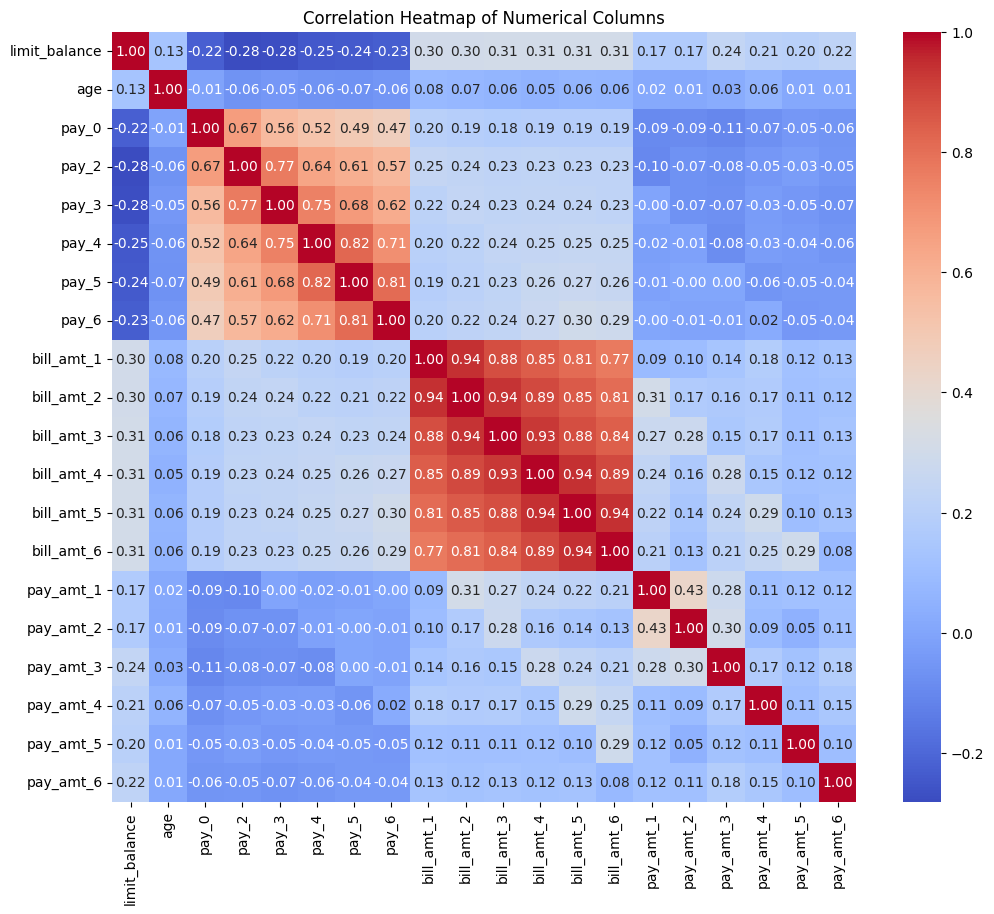

In [19]:
# Mendefinisikan daftar kolom numerik
num_col = ['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
           'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
           'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

# Menyaring kolom numerik
numerical = [col for col in data if col in num_col]

# Menghitung matriks korelasi
correlation_matrix = data[numerical].corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Menambahkan judul
plt.title('Correlation Heatmap of Numerical Columns')

# Menampilkan plot
plt.show()


* Berdasarkan heatmap, terdapat korelasi pada hubungan `pay_amt_1` dengan `pay_amt_2` dimana nilai korelasinya adalah `0.43`. Korelasi ini menunjukkan hubunga yang lemah dari keduanya dimana pembayaran orang pada `pay_amt_1` memiliki jumlah yang berbanding lurus dengan `pay_amt_2`
* Pada kolom bill, seluruh kolom bill memiliki korelasi yang kuat. Berdasarkan data sendiri, hal ini disebabkan karena besarnya tagihan kredit dari 1 bulan ke bulan lainnya memiliki nilai yang sama atau terus bertambah

## Outlier check


In [20]:
# Menghitung jumlah kolom dalam dataset
len(data.columns)

24

In [21]:
# Membuat fungsi IQR untuk mendeteksi outlier
def deteksi_outlier(df, threshold=1.5):
    ''' Fungsi IQR
    Perameters:
    - df (pandas Dataframe)
    - threshold penyesuaian iqr

    penggunaan:
    - deteksi_outlier(df=data)'''
    outliers= {}
    percentages = {}

    for col in df.columns:
        if df[col].dtypes != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)

            iqr = (q3 - q1)

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            check_outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers[col]= len(check_outlier)

            if len(df[col]) != 0:
                percentage_outlier = len(check_outlier) * 100 / len(df[col])
            else:
                percentage_outlier = 0

            percentages[col] = "{:.2f}%".format(percentage_outlier)

    data = pd.DataFrame({
        'nama_col': list(outliers.keys()),
        'persen_outlier': list(percentages.values())
    })

    return data


In [22]:
# Mengdefinisikan outlier dataframe
outlier = deteksi_outlier(df=data)
outlier

,nama_col,persen_outlier
0,limit_balance,0.47%
1,sex,0.00%
2,education_level,1.38%
3,marital_status,0.00%
4,age,0.98%
5,pay_0,10.32%
6,pay_2,14.20%
7,pay_3,13.77%
8,pay_4,12.08%
9,pay_5,10.73%


**Kesimpulan**

- **Kolom dengan Persentase Outlier Rendah**:
  - `limit_balance`, `sex`, `education_level`, `marital_status`, `age` memiliki persentase outlier yang relatif rendah (< 2%). Ini menunjukkan bahwa sebagian besar data dalam kolom ini berada dalam rentang normal.

- **Kolom dengan Persentase Outlier Tinggi**:
  - `default_payment_next_month` memiliki persentase outlier tertinggi yaitu 21.42%. Hal ini mungkin menunjukkan bahwa ada banyak variasi dalam status pembayaran pelanggan berikutnya.
  - Kolom `pay_*` juga menunjukkan persentase outlier yang tinggi, berkisar antara 10% hingga 14%. Ini mungkin menunjukkan variasi yang signifikan dalam pembayaran bulanan pelanggan.
  - Kolom `bill_amt_*` dan `pay_amt_*` juga menunjukkan adanya outliers dengan persentase sekitar 7-10%. Ini dapat menunjukkan fluktuasi yang tinggi dalam jumlah tagihan dan pembayaran bulanan.

1. **Penanganan Outliers**:
   - **Remove Outliers**: Menghapus outliers jika mereka diidentifikasi sebagai data yang salah atau tidak relevan.
   - **Transformasi Data**: Menggunakan teknik seperti log transformation atau robust scaling untuk mengurangi pengaruh outliers.
   - **Model Robust**: Mempertimbangkan penggunaan model yang lebih tahan terhadap outliers seperti decision tree atau random forest.

2. **Investigasi Lebih Lanjut**:
   - **Analisis Spesifik**: Melakukan analisis lebih mendalam pada kolom dengan outliers tinggi untuk memahami penyebabnya.
   - **Domain Knowledge**: Melibatkan ahli domain untuk menentukan apakah outliers tersebut merupakan kejadian yang mungkin terjadi dalam konteks bisnis.

# vi. Feature Engineering

Tujuan dari feature engineering adalah untuk meningkatkan kinerja model machine learning dengan memilih, mengubah, dan membuat fitur-fitur yang lebih relevan, informatif, dan berguna dari data mentah. ```Diharapkan feature engineering dapat membantu model untuk bekerja lebih baik memahami pola-pola dalam data dan membuat prediksi yang lebih akurat.``` Feature engineering juga membantu mengurangi dimensi data dan mengatasi masalah seperti overfitting dan underfitting.

In [23]:
# Membuat copy dari dataset
df = data.copy()

In [24]:
# Loading data yg sudah di copy
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


**Penjelasan**  
Memasuki feature engineering, langkah awal adalah ```membuat copy dataframe dari raw dataset  bernama df agar raw data tetap bisa diakses apabila dibutuhkan saat data dimodifikasi.``` Berdasarkan pemanggilan data, artinya dataset yang dicopy berhasil di load. Selanjutnya, kita dapat mengidentifikasi kardinalitas data non numerik.

## Checking Cardinality

In [25]:
# Memfilter hanya kolom kategorikal ke dalam variabel
kolom_kat = df.select_dtypes(include=['object', 'datetime64']).columns.to_list()

# Declare unique data
kat_unique_data = []

# Melakukan loop pada setiap kolom kategorikal dan menghitung nilai unik, lalu menambahkan hasil perhitungan ke dalam daftar kosong
for kolom in kolom_kat:
    kat_unique_data.append([kolom, df[kolom].nunique()])

# Menampilkan dataframe
pd.DataFrame(data=kat_unique_data, columns=['kolom_kategorikal', 'unique_value'])

,kolom_kategorikal,unique_value


**Penjelasan**  
tidak muncul karena semua data adalah numerikal jadi tahap check cardinality tidak di lanjutkan

## Split Train-Test

In [26]:
# Split target dan fitur
X = df.drop(columns=['default_payment_next_month'], axis=1)         # X sebagai fitur(targeted columns)
y = df['default_payment_next_month']                                # y sebagai target (Price Column)

In [27]:
# Split Train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 14)


# Cek size Train dan Test
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (2371, 23)
X test shape: (593, 23)
y train shape: (2371,)
y test shape: (593,)


**Penjelasan**  
- ```Dataframe dipisah menjadi X dan y, x sebagai fitur-fitur dan y sebagai target.```  
- ```Kemudian dataframe dipisah untuk train dan test```


## Handling Missing Value

In [28]:
# Cek missing value pada y (targeted column)
y_train_miss = y_train.isnull().sum()
y_test_miss = y_test.isnull().sum()

# Cetak hasil perhitungan
print("Jumlah Missing Value di y_train :",y_train.isnull().sum())
print("Jumlah Missing Value di y_test :",y_test.isnull().sum())

Jumlah Missing Value di y_train : 0
Jumlah Missing Value di y_test : 0


Langkah ini dilakukan untuk memeriksa apakah ada missing value dalam dataset. Berikut adalah hasil pengecekan:

- Jumlah Missing Value di y_train: 0
- Jumlah Missing Value di y_test: 0

Diketahui bahwa tidak terdapat missing value dalam data yang digunakan.


In [29]:
# Cek X data shape
shape_X_train = X_train.shape
shape_X_test = X_test.shape

# Cek y data shape
shape_y_train = y_train.shape
shape_y_test = y_test.shape

# Cetak hasil
print("X train Shape    :", shape_X_train)
print("X test Shape     :", shape_X_test)
print("y train Shape    :", shape_y_train)
print("y test Shape     :", shape_y_test)

X train Shape    : (2371, 23)
X test Shape     : (593, 23)
y train Shape    : (2371,)
y test Shape     : (593,)


**Penjelaan**  
setelah mengetahui missing value di y train dan test, sebelum di drop saya menyimpan index missing value ke dalam variable. Setelah itu kita dapat melakukan drop di index yang sama pada X train dan test agar data seimbang. Dapat dilihat setelah melakukan pengecekan kembali,``` missing value di y sudah 0 dan row data di X dan y sudah berkurang, tandanya row data dengan index missing value y yang sama sudah di hapus di X dan keduanya bersih dari missing value.```

## Handling Outlier

In [30]:
# Membuat data dan kolom untuk distribusi normal
data_normal = []
column_normal = []

# Membuat data dan kolom untuk distribusi skew
data_skewed = []
column_skewed = []

# Melakukan loop pada setiap kolom numerik untuk memfilter distribusi data ke dalam kolom yang terdistribusi normal atau kolom yang terdistribusi miring
for num in X_train:
    skewness = X_train[num].skew()
    
    # Jika data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Jika data low skew
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data low skew
    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data high skew
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

**Penjelasan**  
Untuk menghandle outlier, kita perlu mengidentifikasi skewness dari tiap kolom numerik di X train. Dengan method .skew() dan for loop kita bisa memfilter jumlah skewness data. 
- ```Apabila skewness data 0,5 ke bawah dan -0,5 ke atas , artinya masuk ke kategori terdistribusi normal.```
- ```Apabila skewness data lebih dari 0,5 dan di bawah -0,5 maka masuk ke dalam kategori skewed data.```  

In [31]:
# Menampilkan kolom yang terdistribusi normal
pd.DataFrame(data=data_normal, columns=['kolom_terdistribusi_normal', 'skewness'])

,kolom_terdistribusi_normal,skewness
0,sex,-0.412817
1,marital_status,-0.029304


**Penjelasan**  
Berdasarkan data terlihat ada 28 kolom yang terdistribusi normal karena skewnessnya di bawah 0,5 dan di atas -0,5. ```Data yang terdistribusi normal akan di handle dengan capping metode Gaussian.``` Alasannya, metode ini menghitung batas atas dan batas bawah dengan menggunakan distribusi normal. Biasanya, batas ini ditentukan berdasarkan mean (rata-rata) dan standar deviasi dari data.

In [32]:
# Menampilkan kolom skew
pd.DataFrame(data=data_skewed, columns=['kolom_skewed', 'skewness','rate'])

,kolom_skewed,skewness,rate
0,limit_balance,0.993389,low
1,education_level,0.883431,low
2,age,0.796021,low
3,pay_0,0.903585,low
4,pay_2,0.859171,low
5,pay_3,0.973252,low
6,pay_4,1.191916,high
7,pay_5,1.160646,high
8,pay_6,1.076662,high
9,bill_amt_1,2.512955,high


**Penjelasan**  
* Data memiliki distribusi normal untuk kolom `sex`, `marital_status`
* Data memiliki distribusi highly skew pada kolom `pay_4`, `pay_5`, `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5` `bill_amt_6`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, `pay_amt_6`.
* Distribusi skewness cenderung memiliki nilai outlier didalamanya. Bahkan, data berdstribusi normal pun juga dapat memiliki nilai outlier didalamnya. Oleh karena itu perlunya handling dari nilai outlier ini.

In [33]:
# Capping Method untuk Normal Distribution  
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

Capping normal distributed column dengan metode `gaussian capping method`

In [34]:
# Capping Method untuk Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

Capping skewed distributed column dengan metode `iqr capping method`

In [35]:
# Plot perbandingan distribusi
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title berdasarkan variabel
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='red')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='red')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

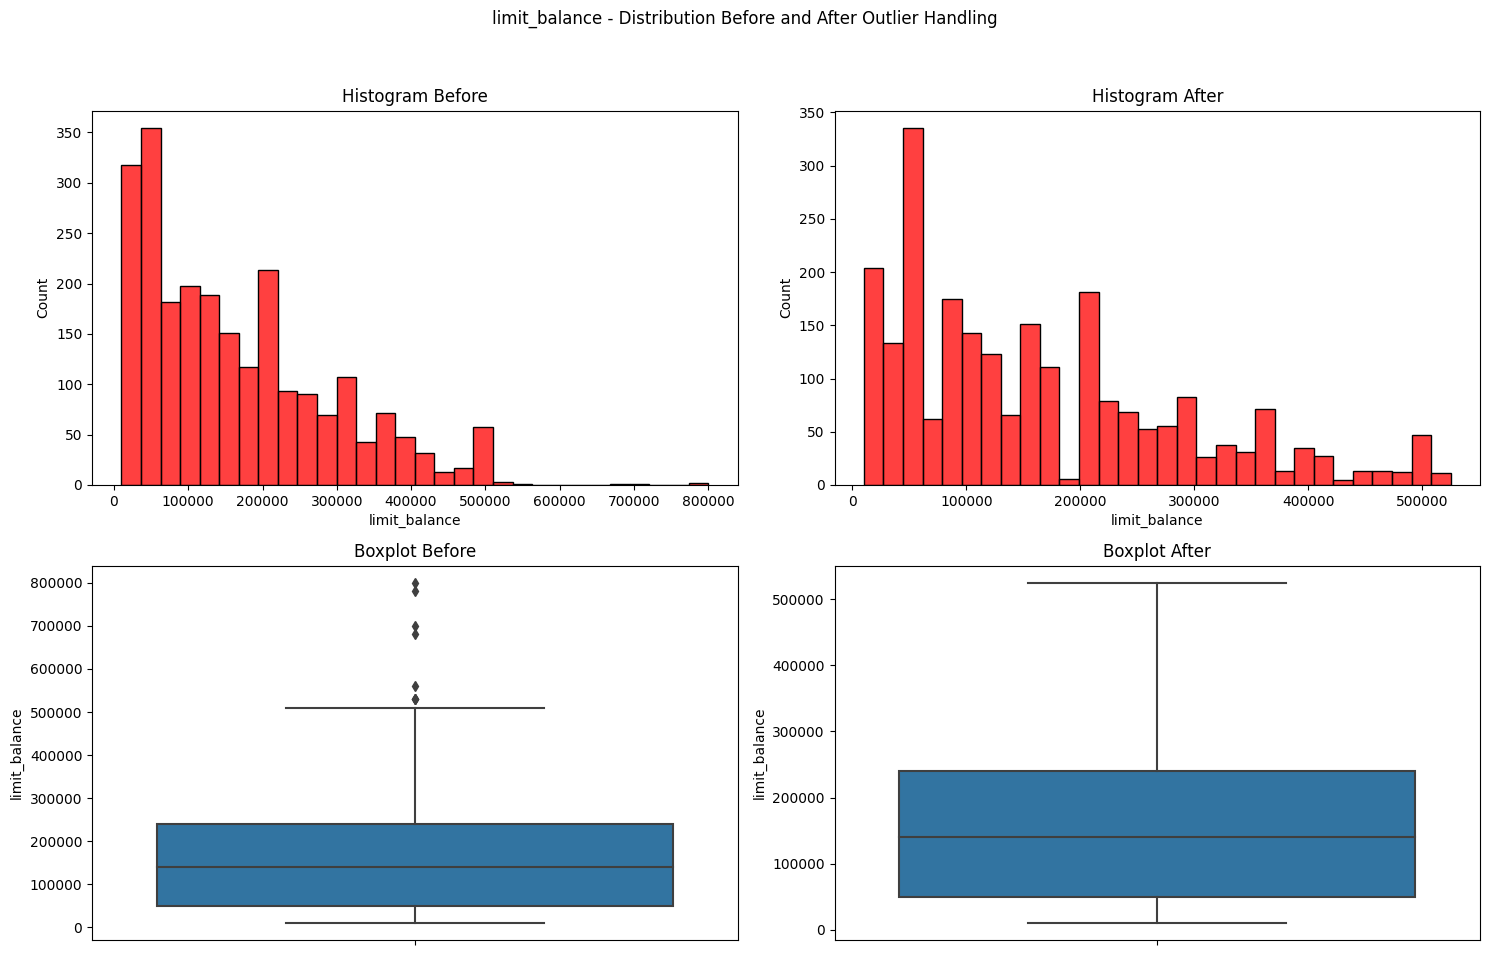

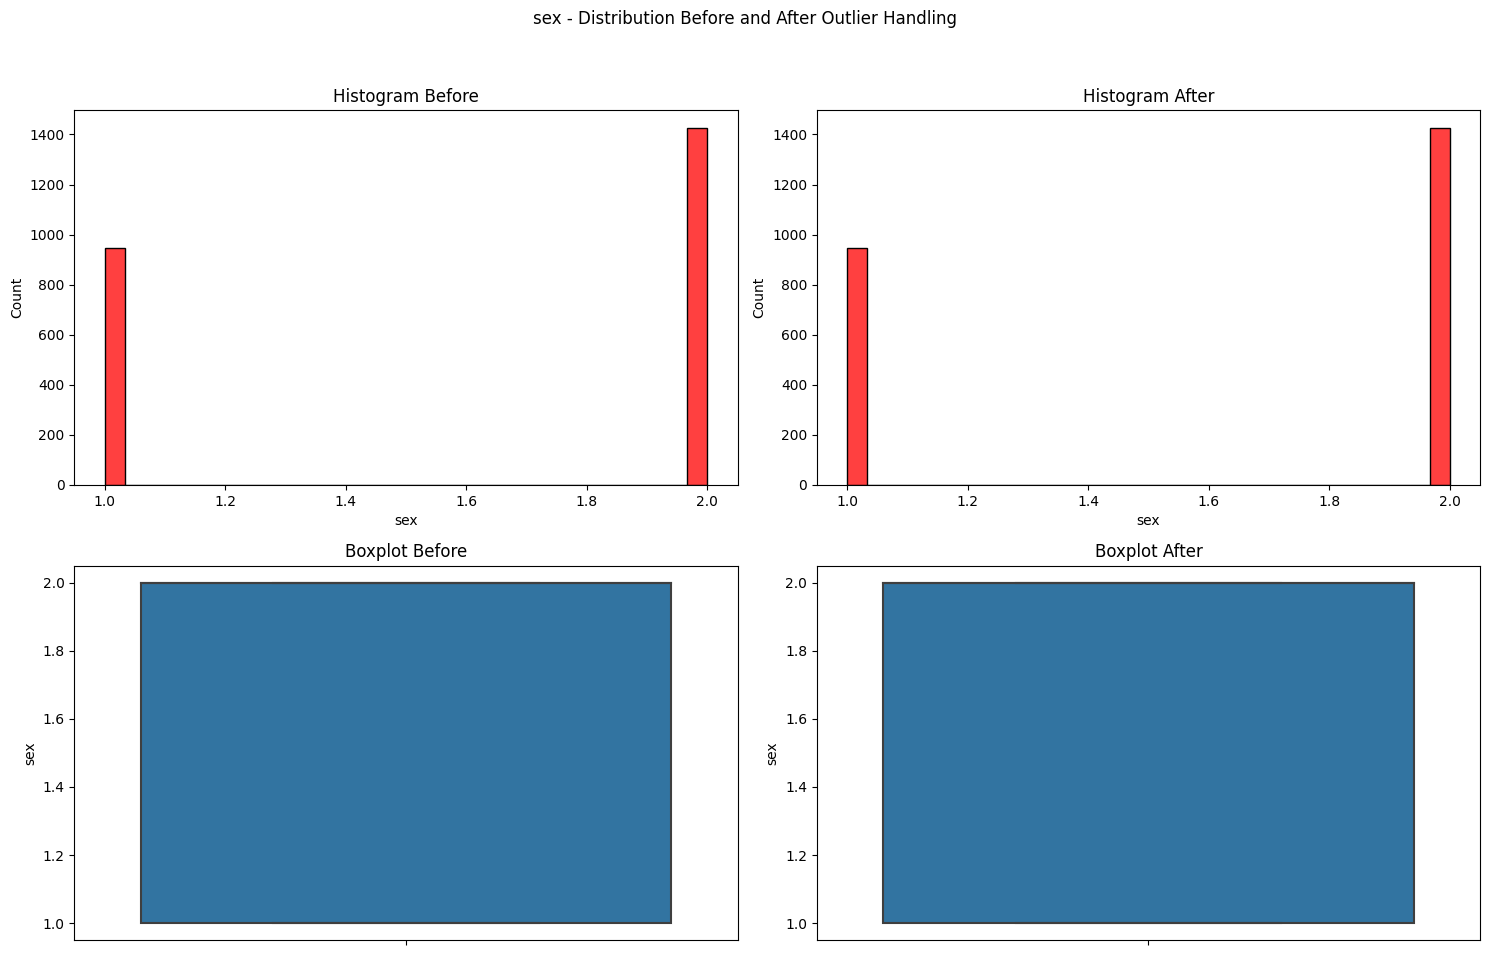

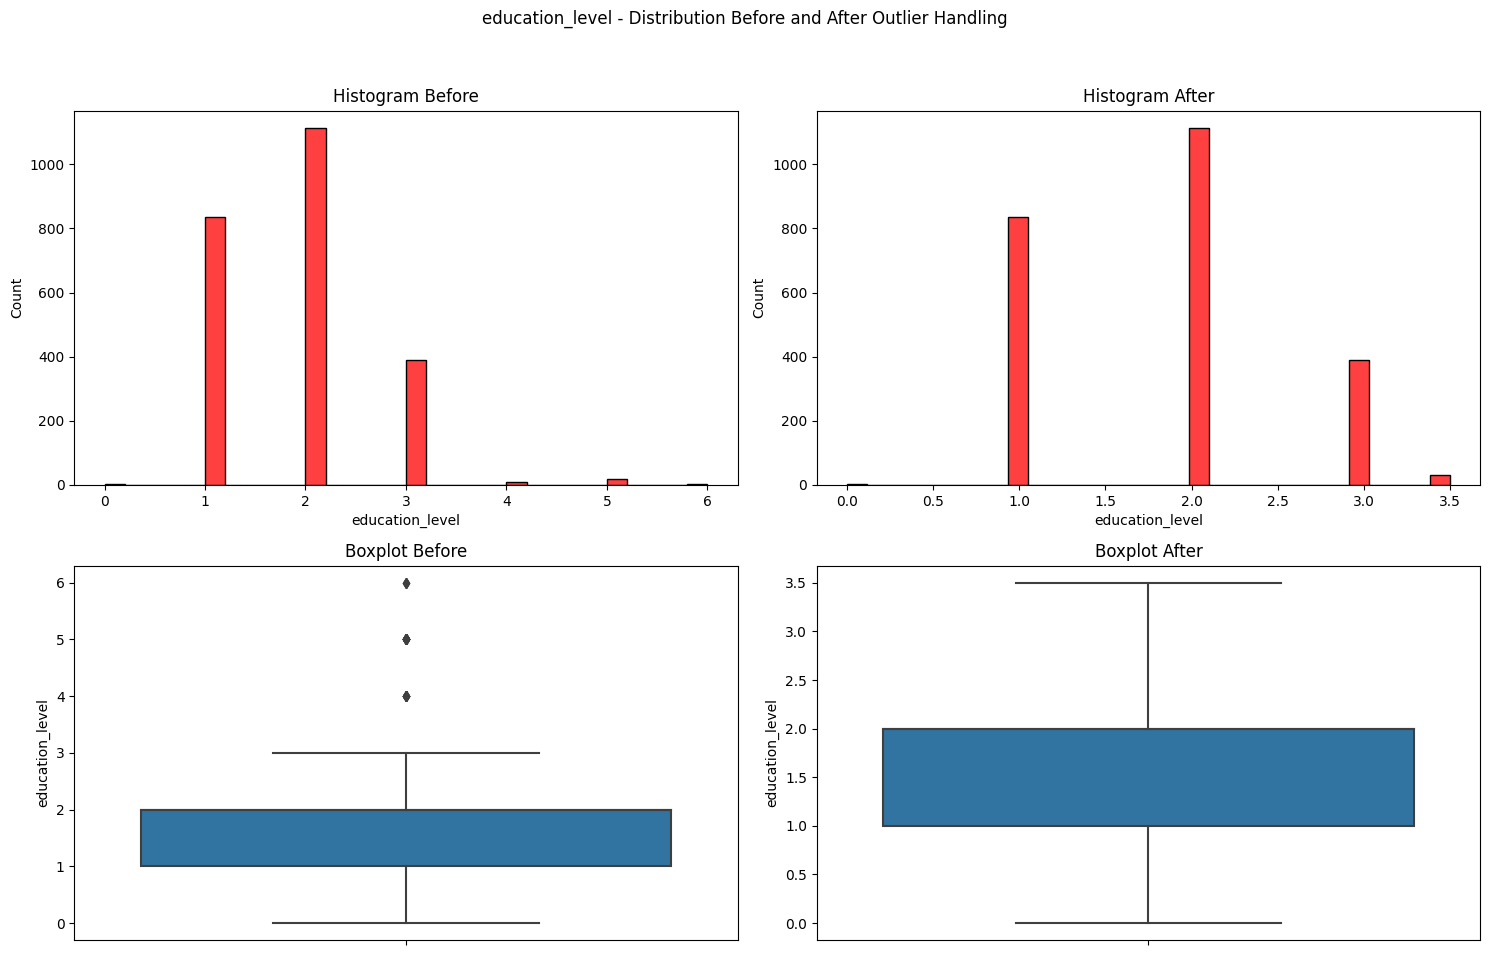

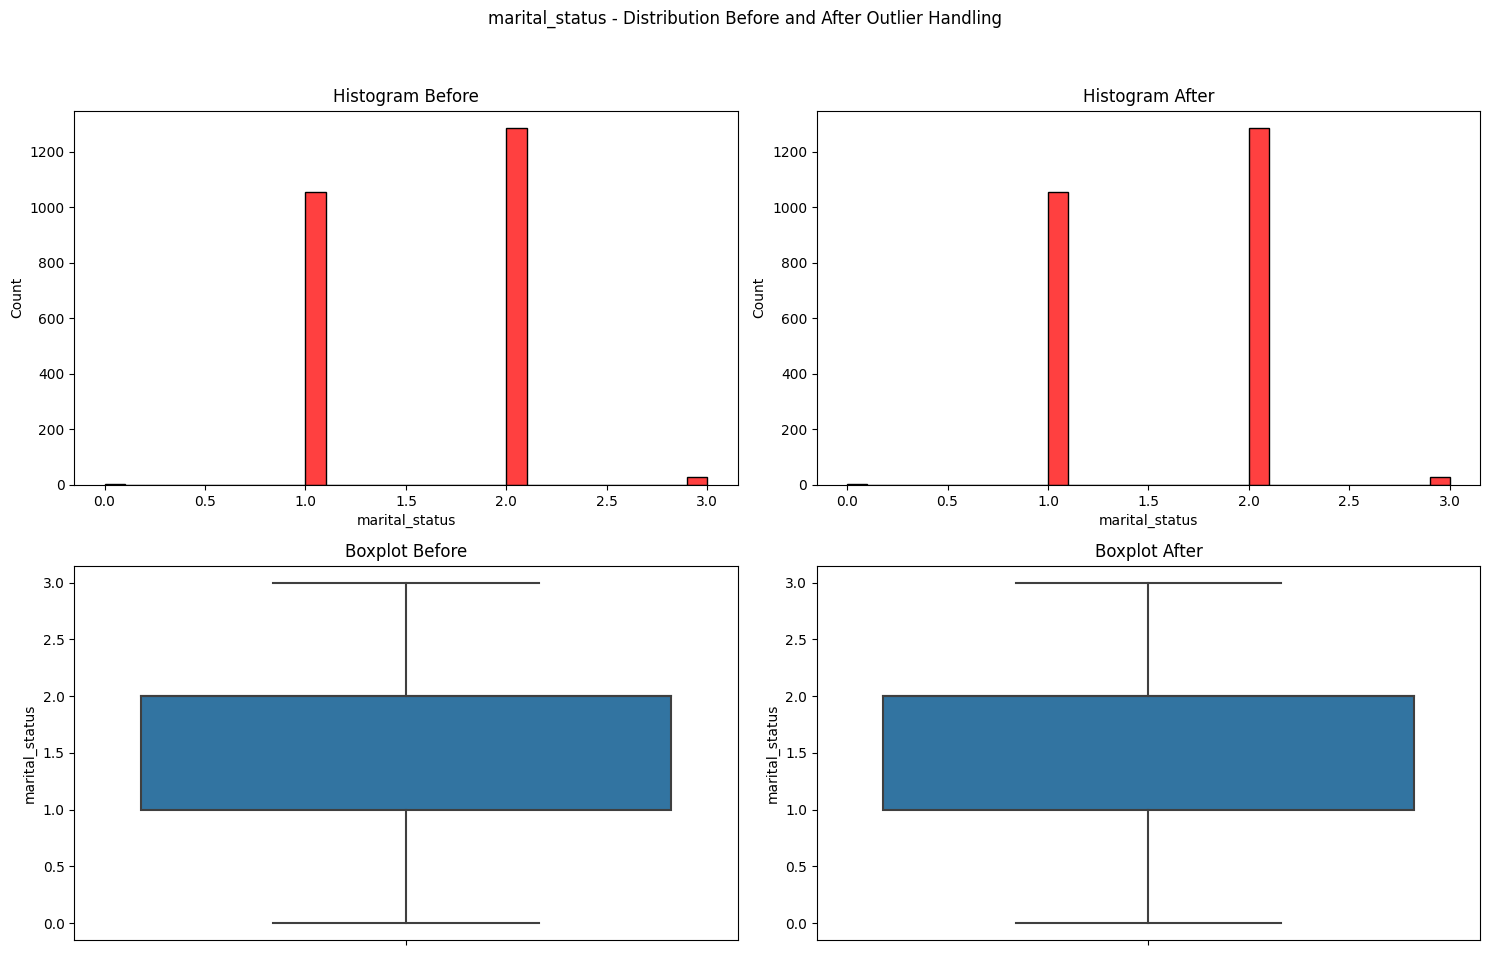

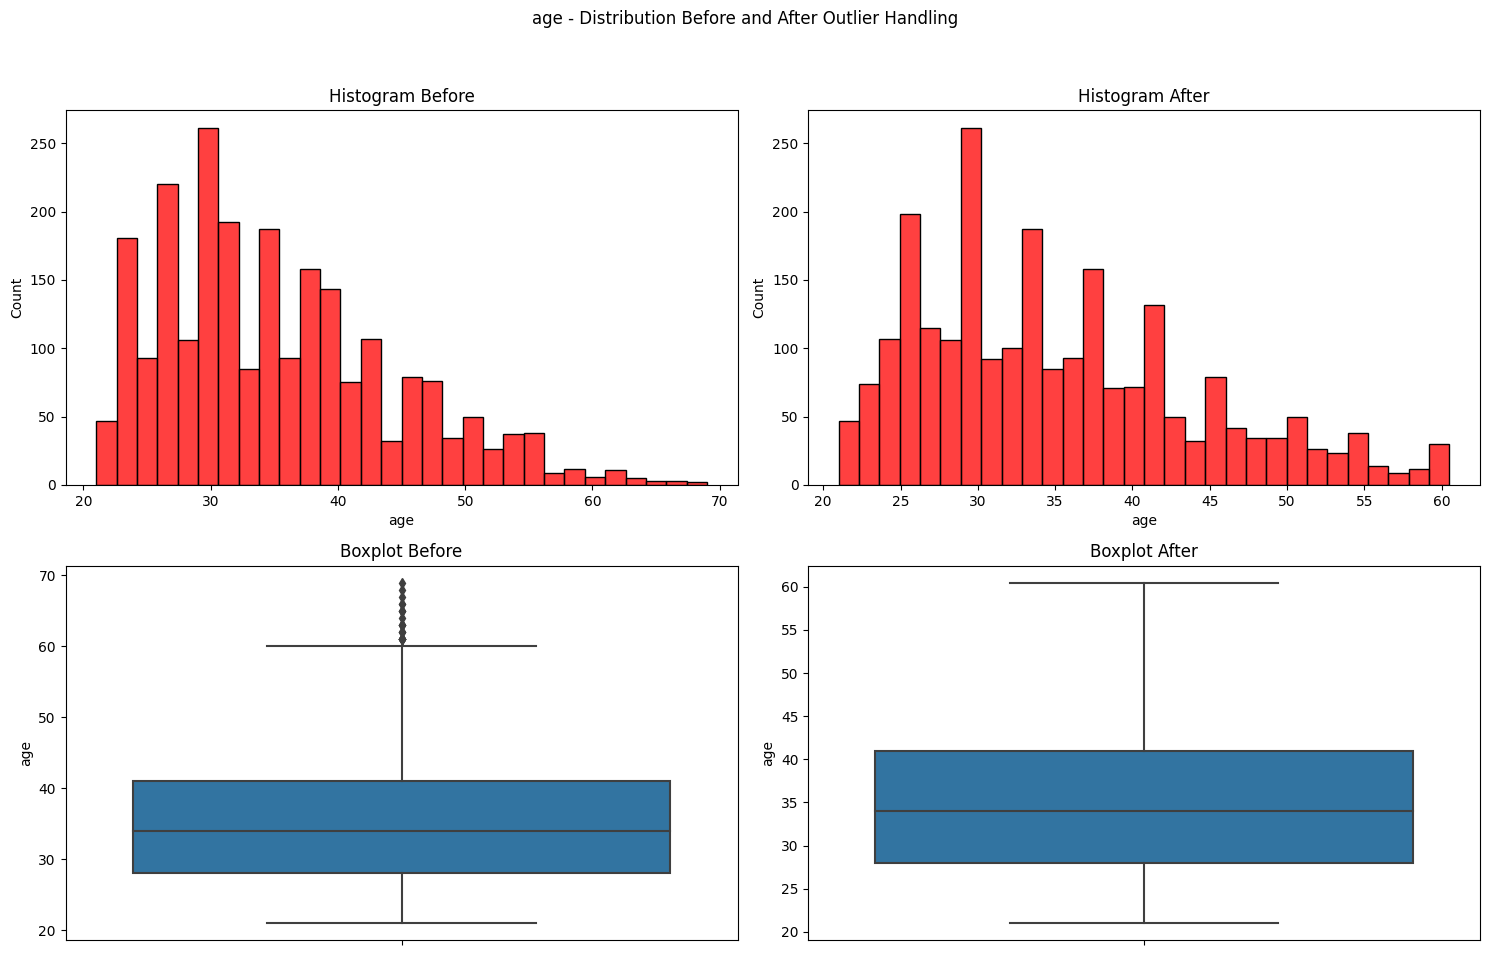

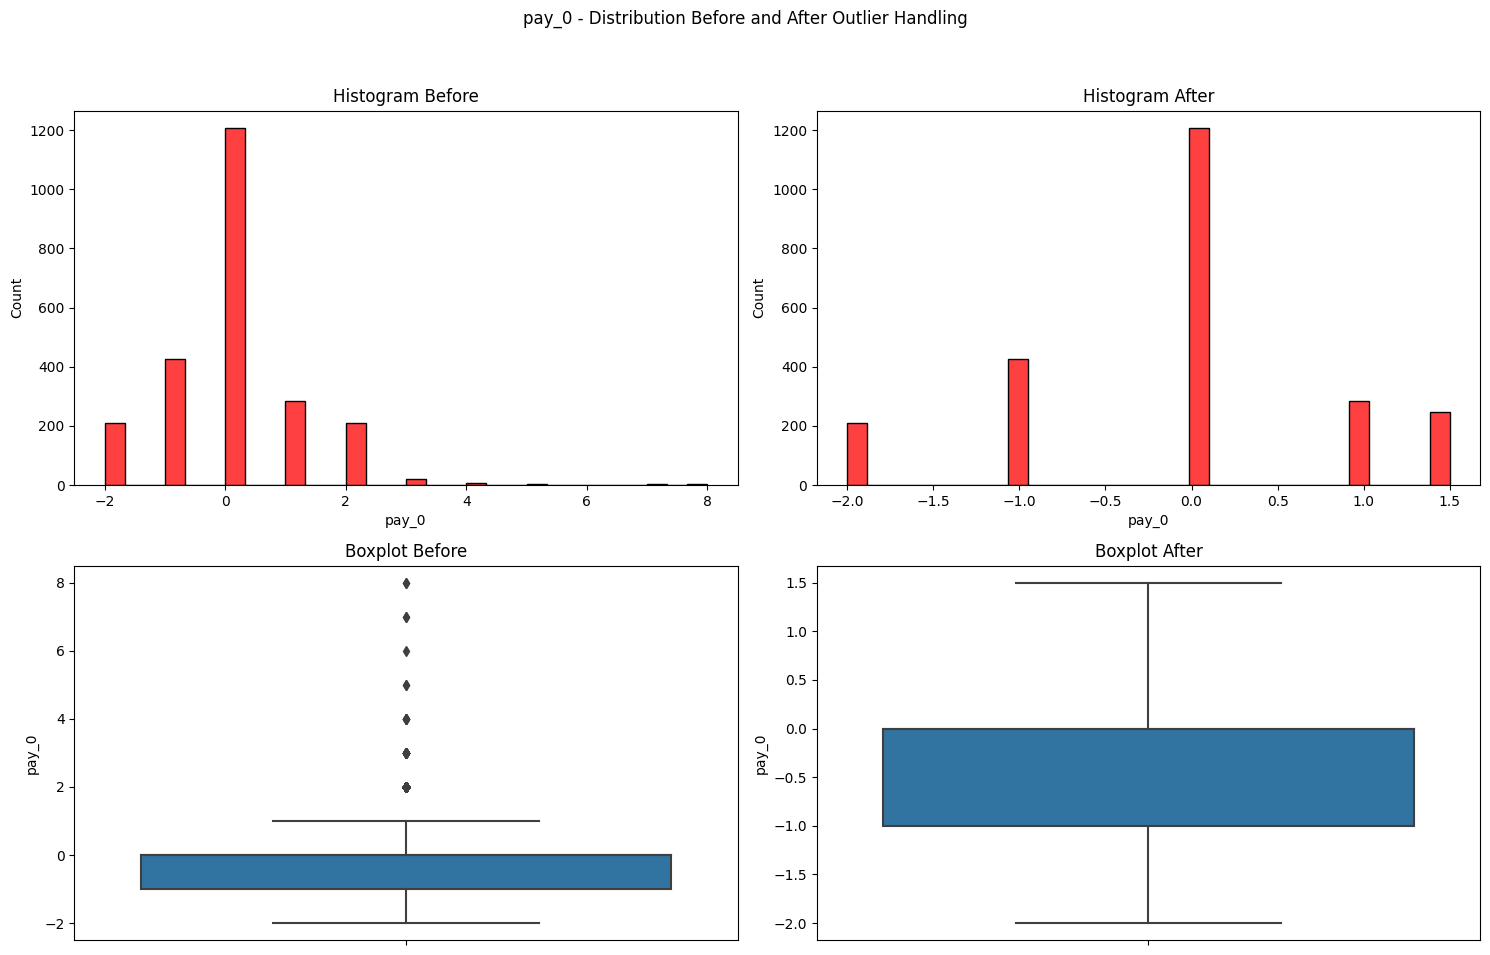

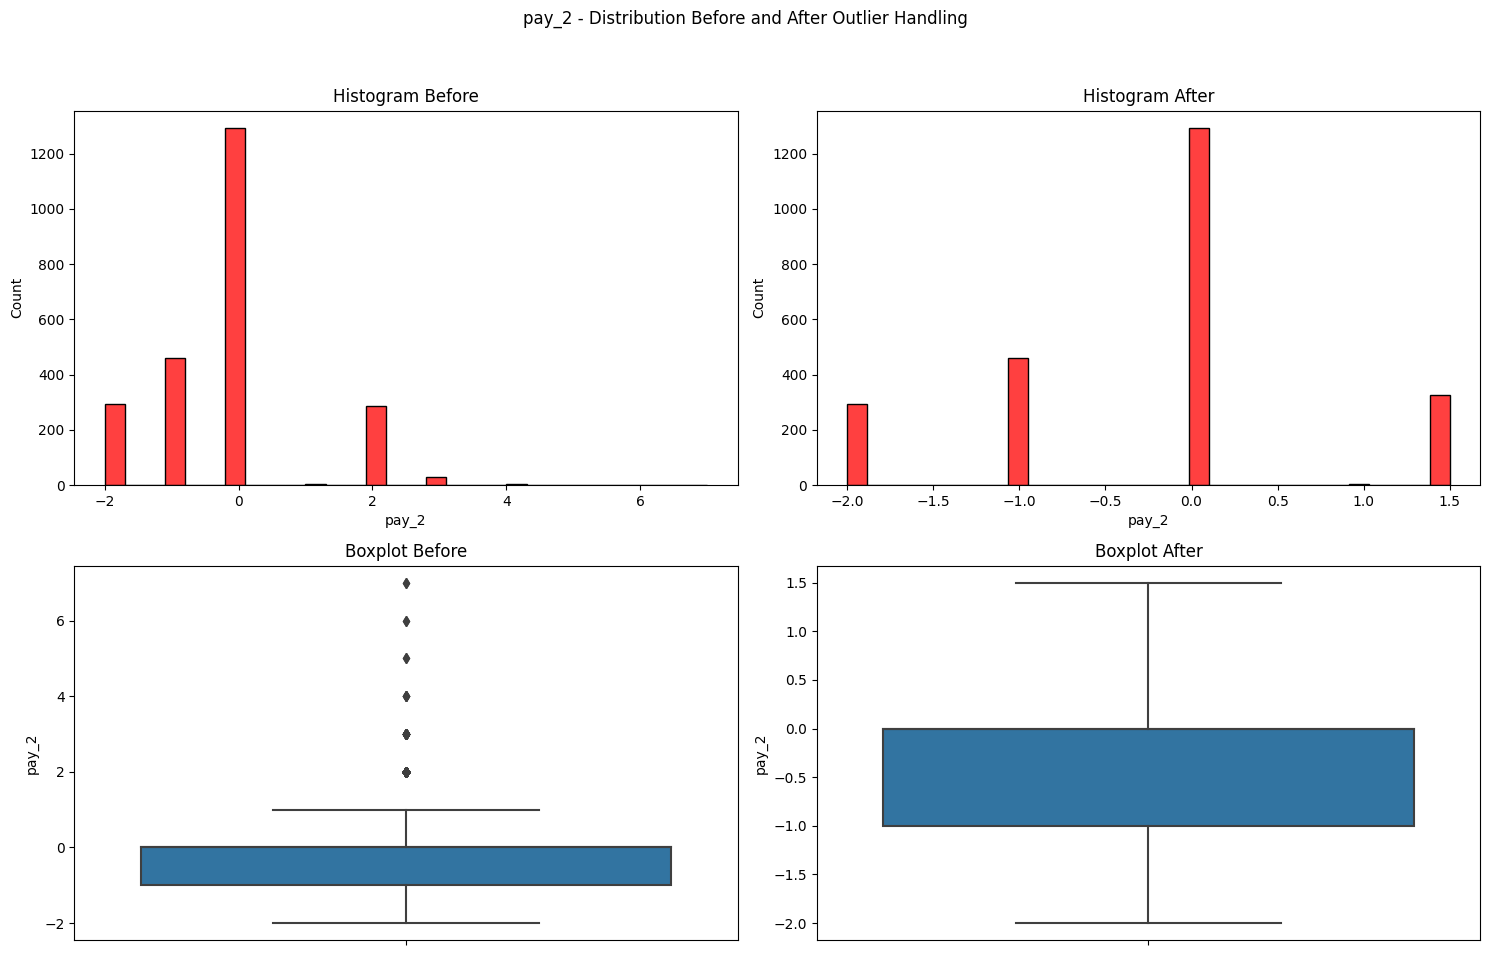

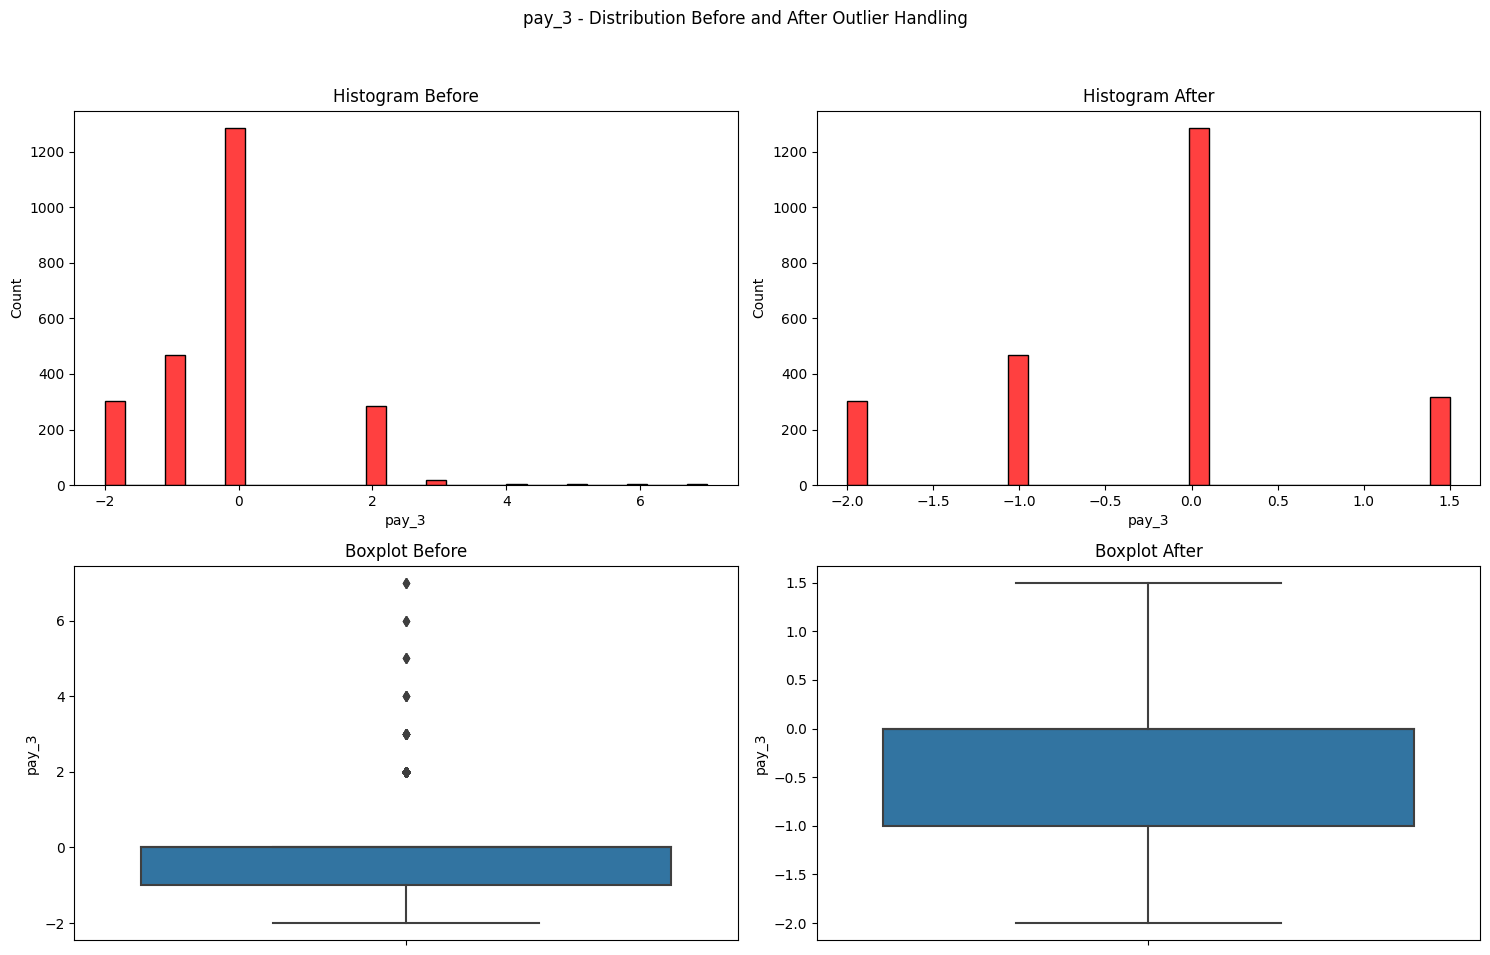

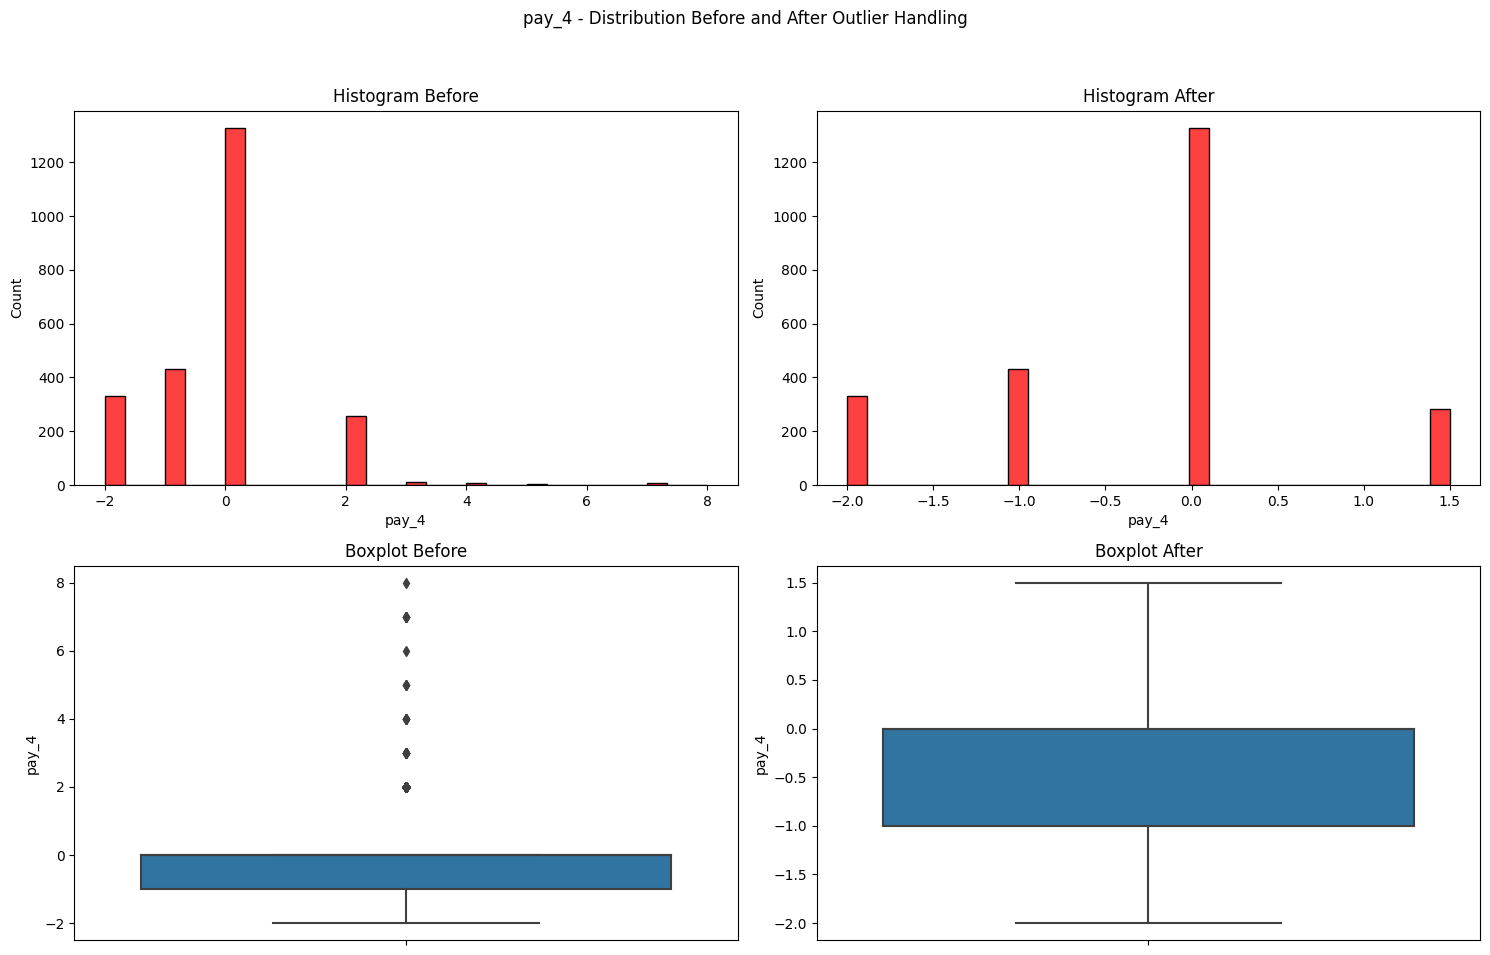

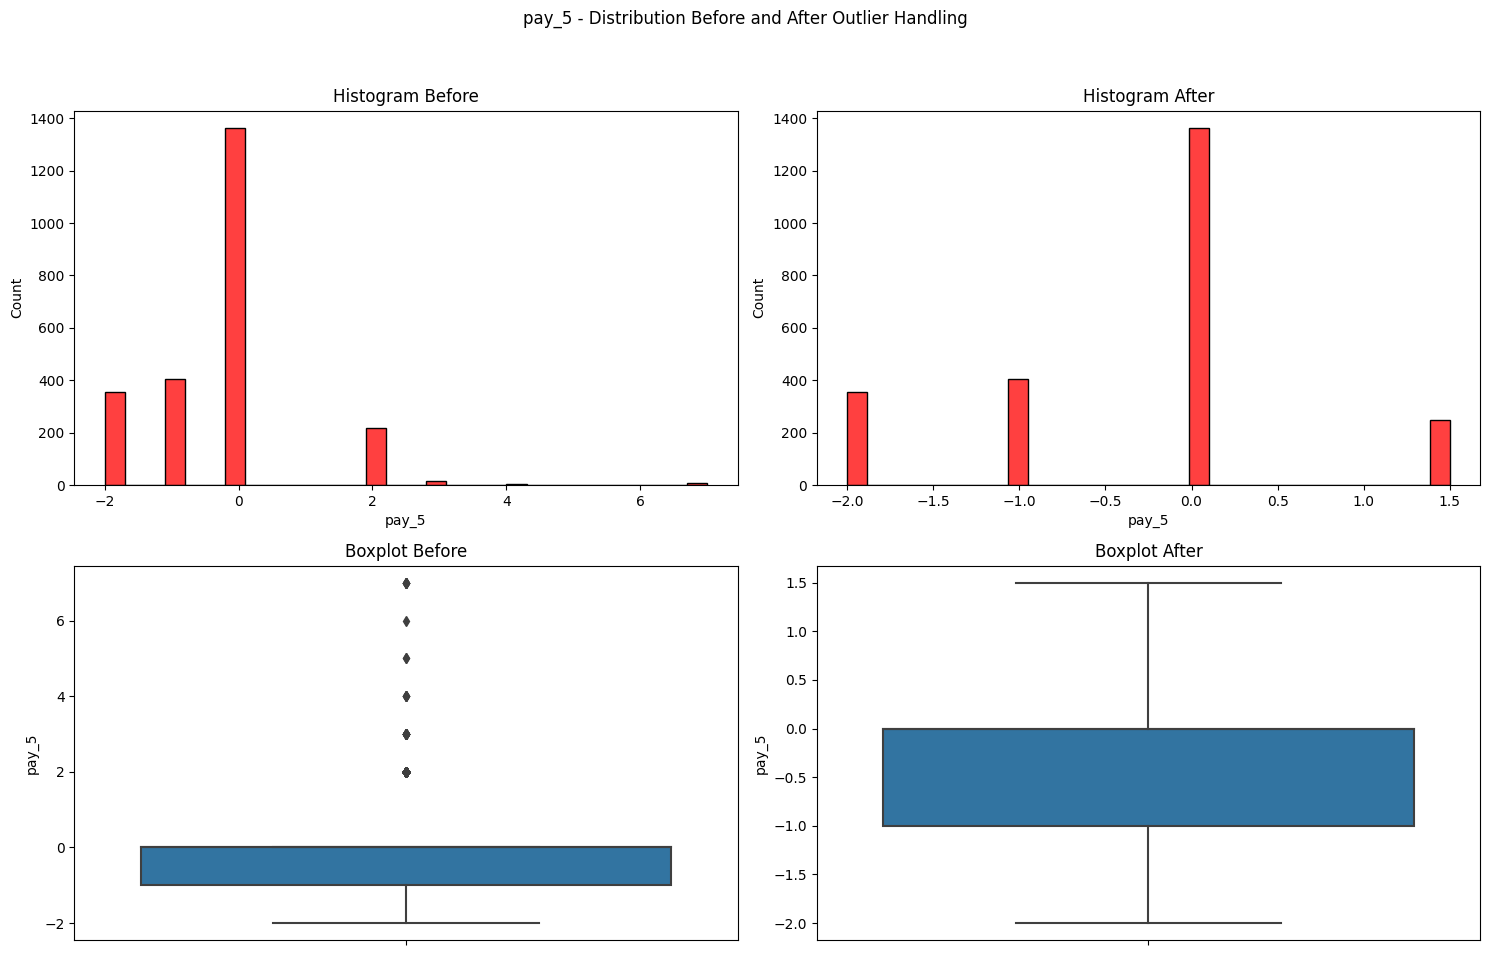

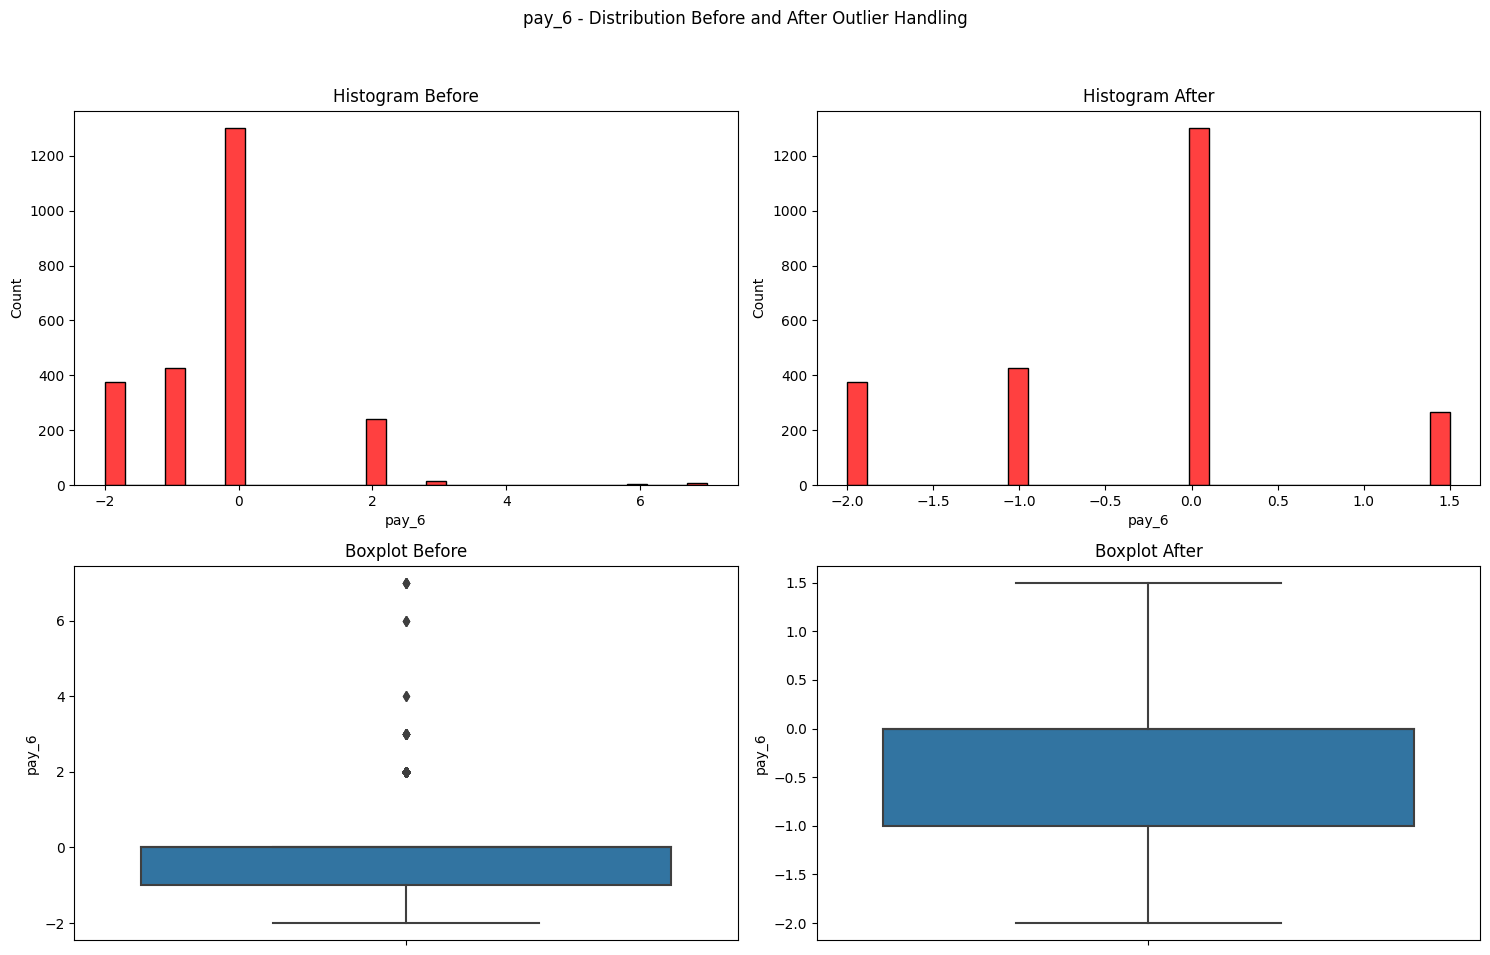

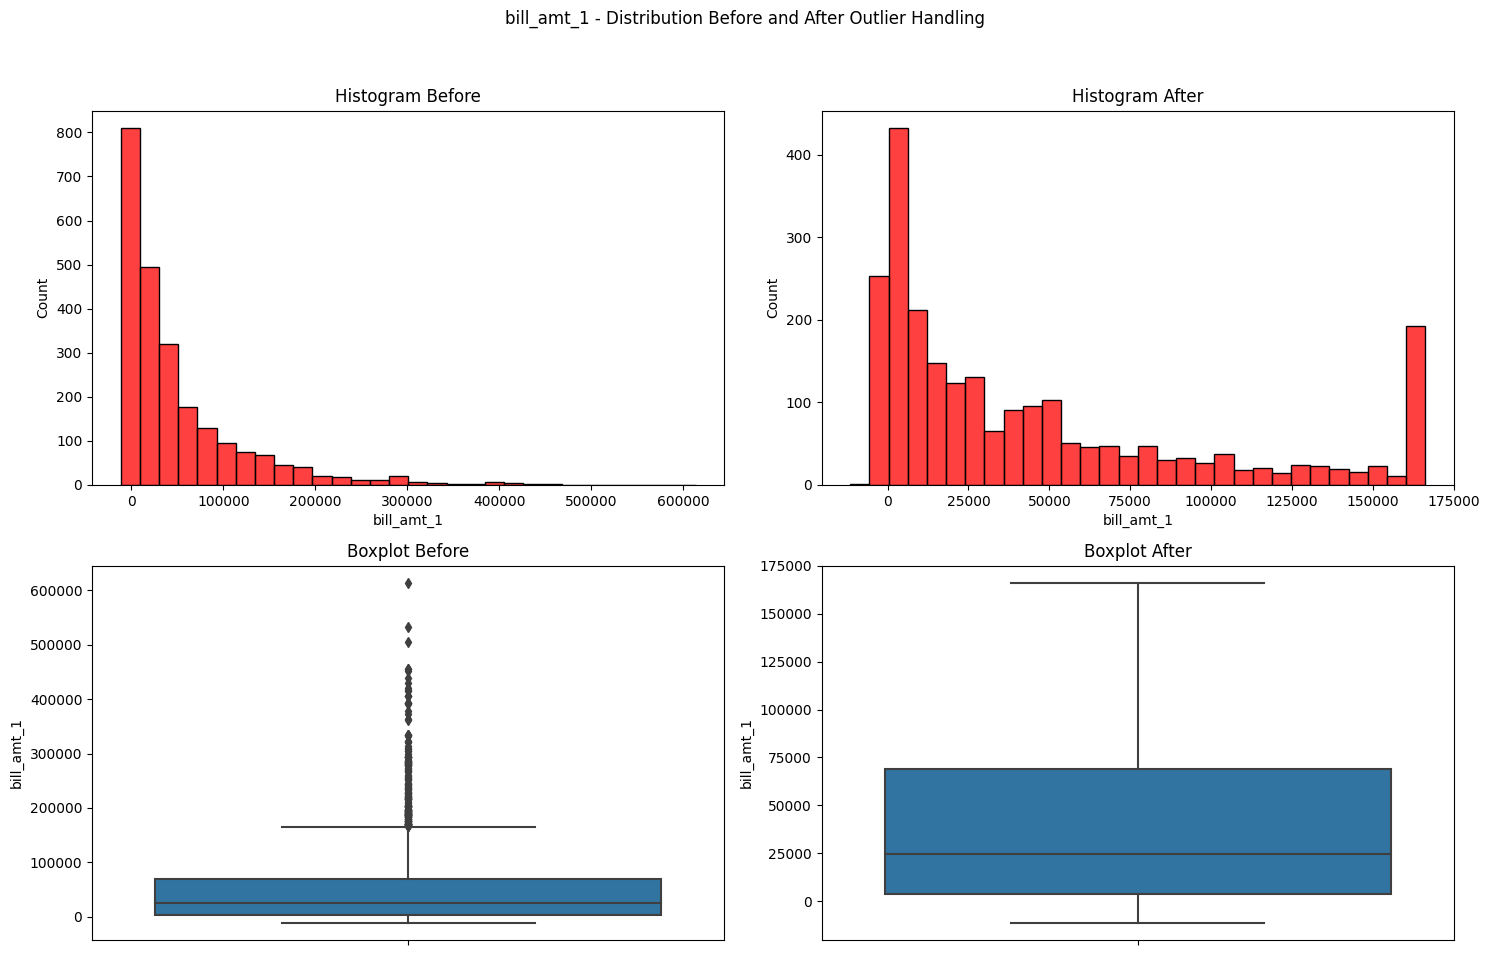

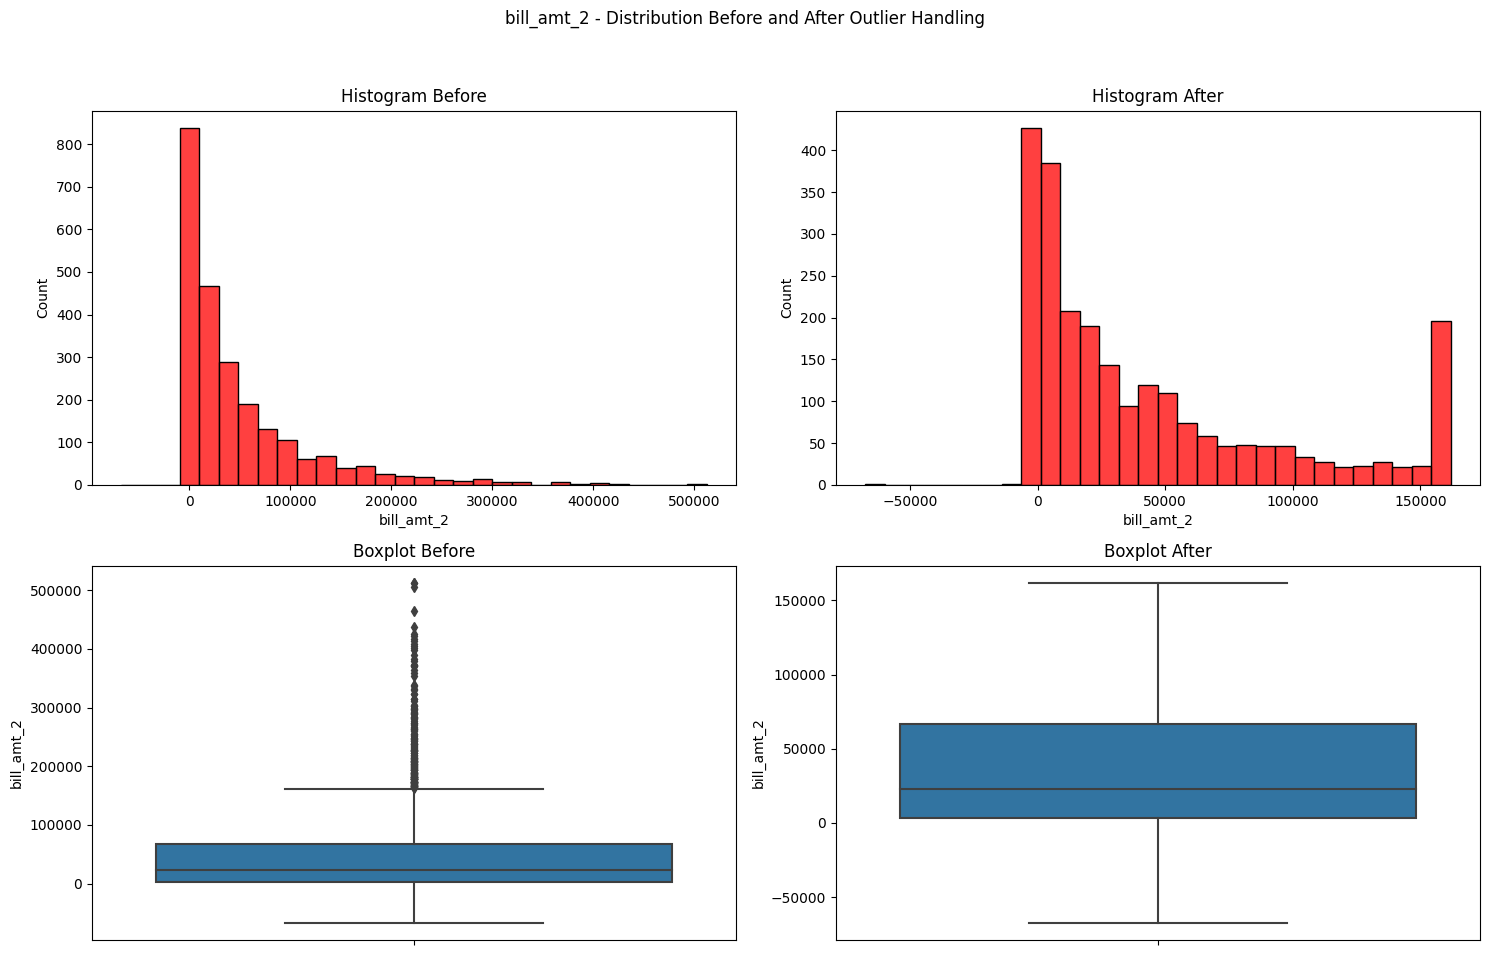

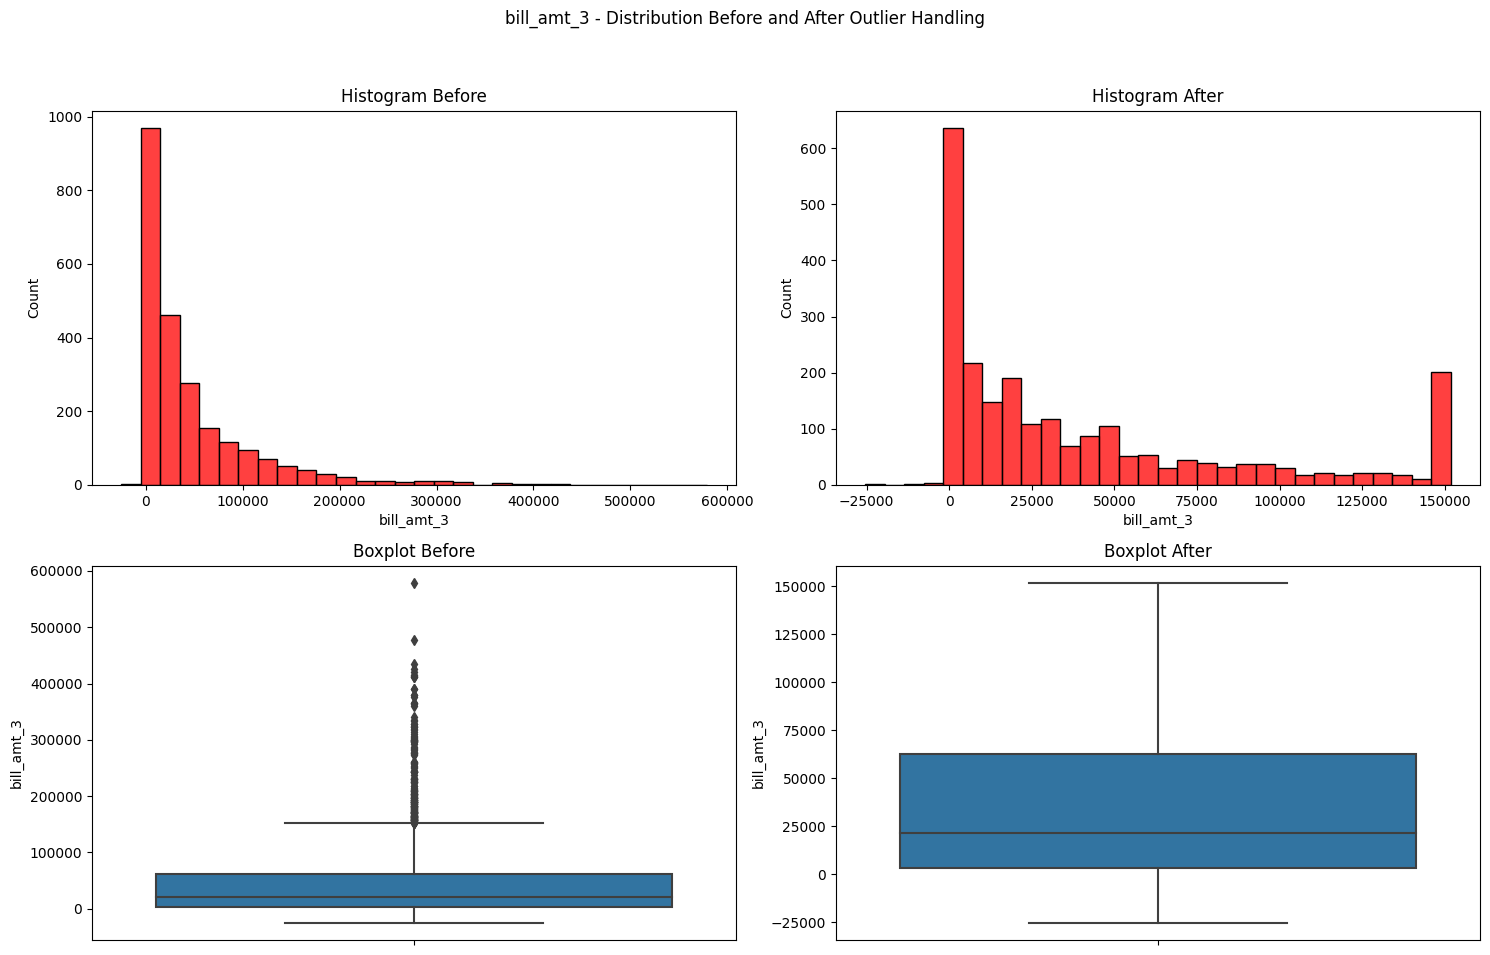

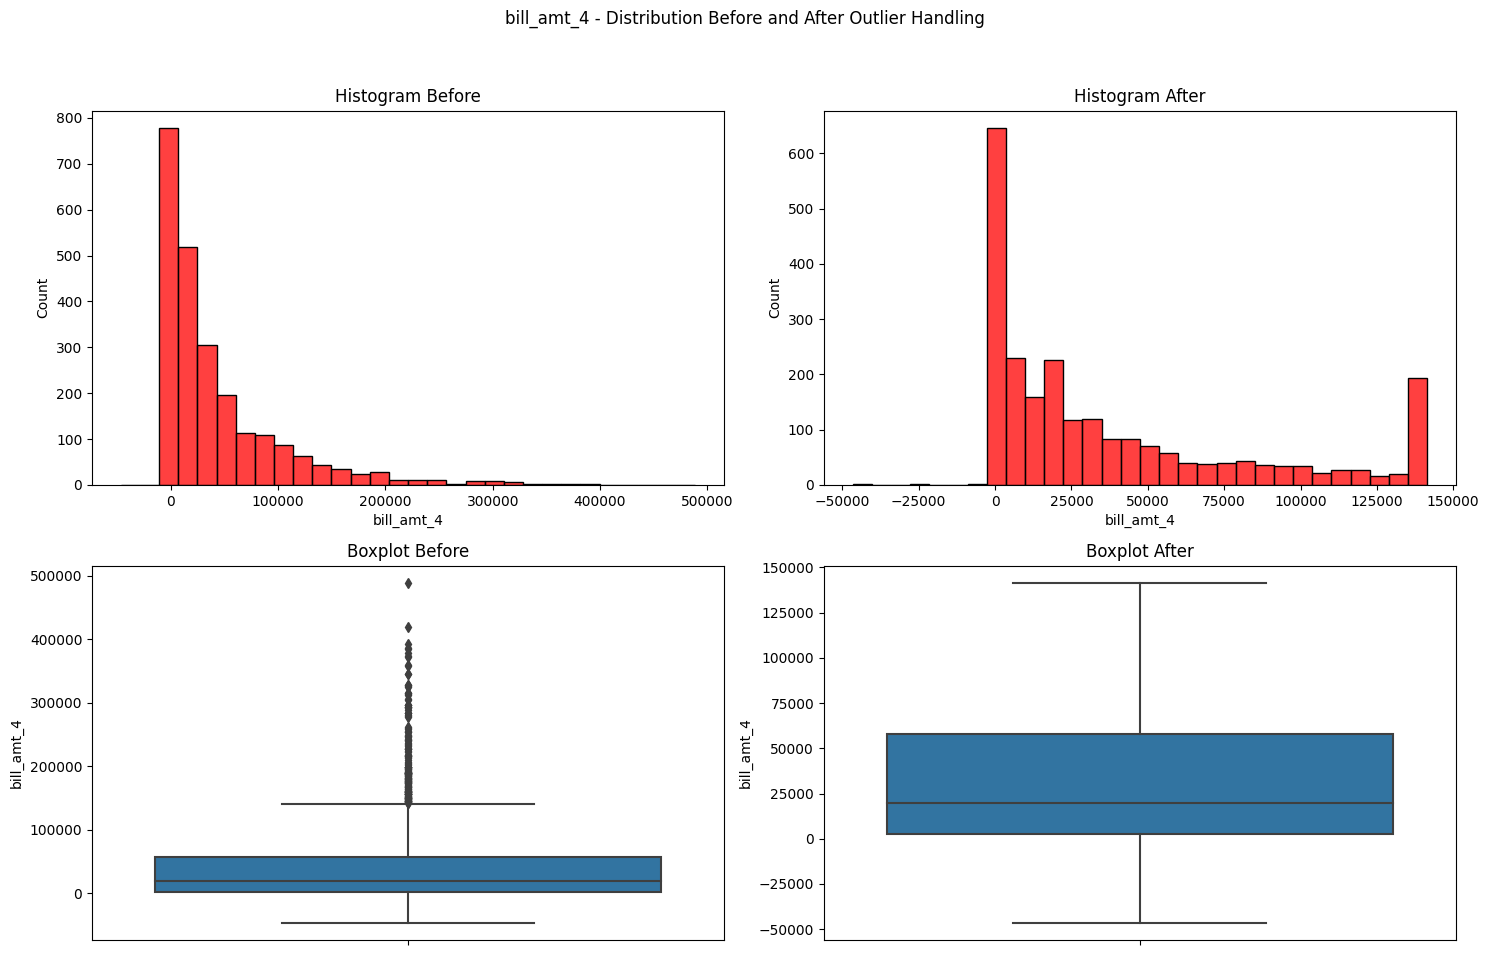

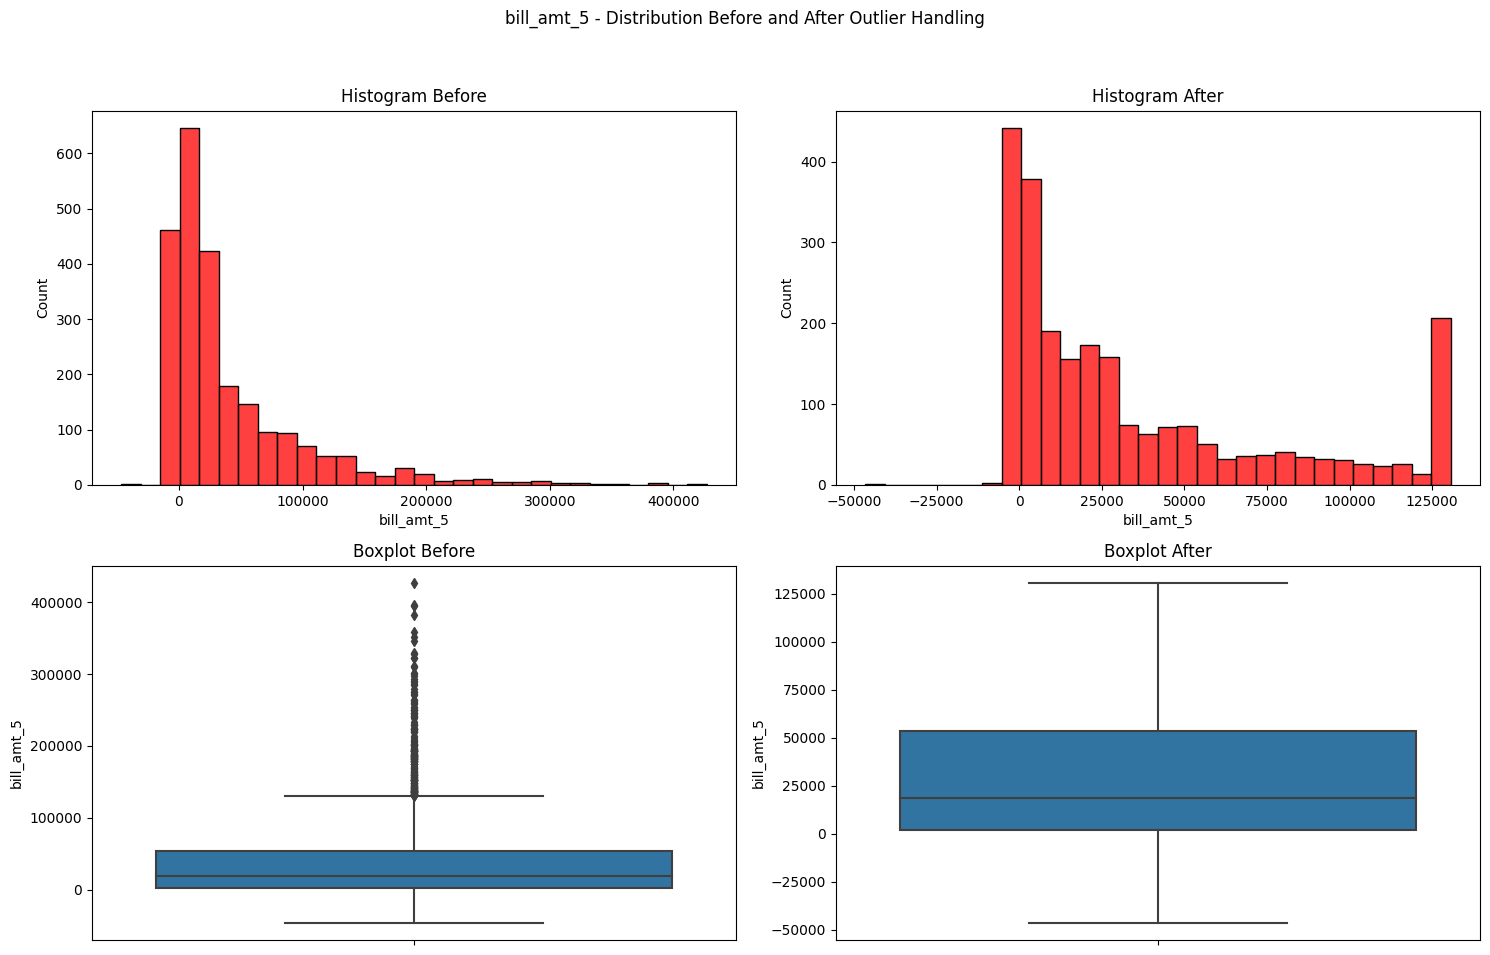

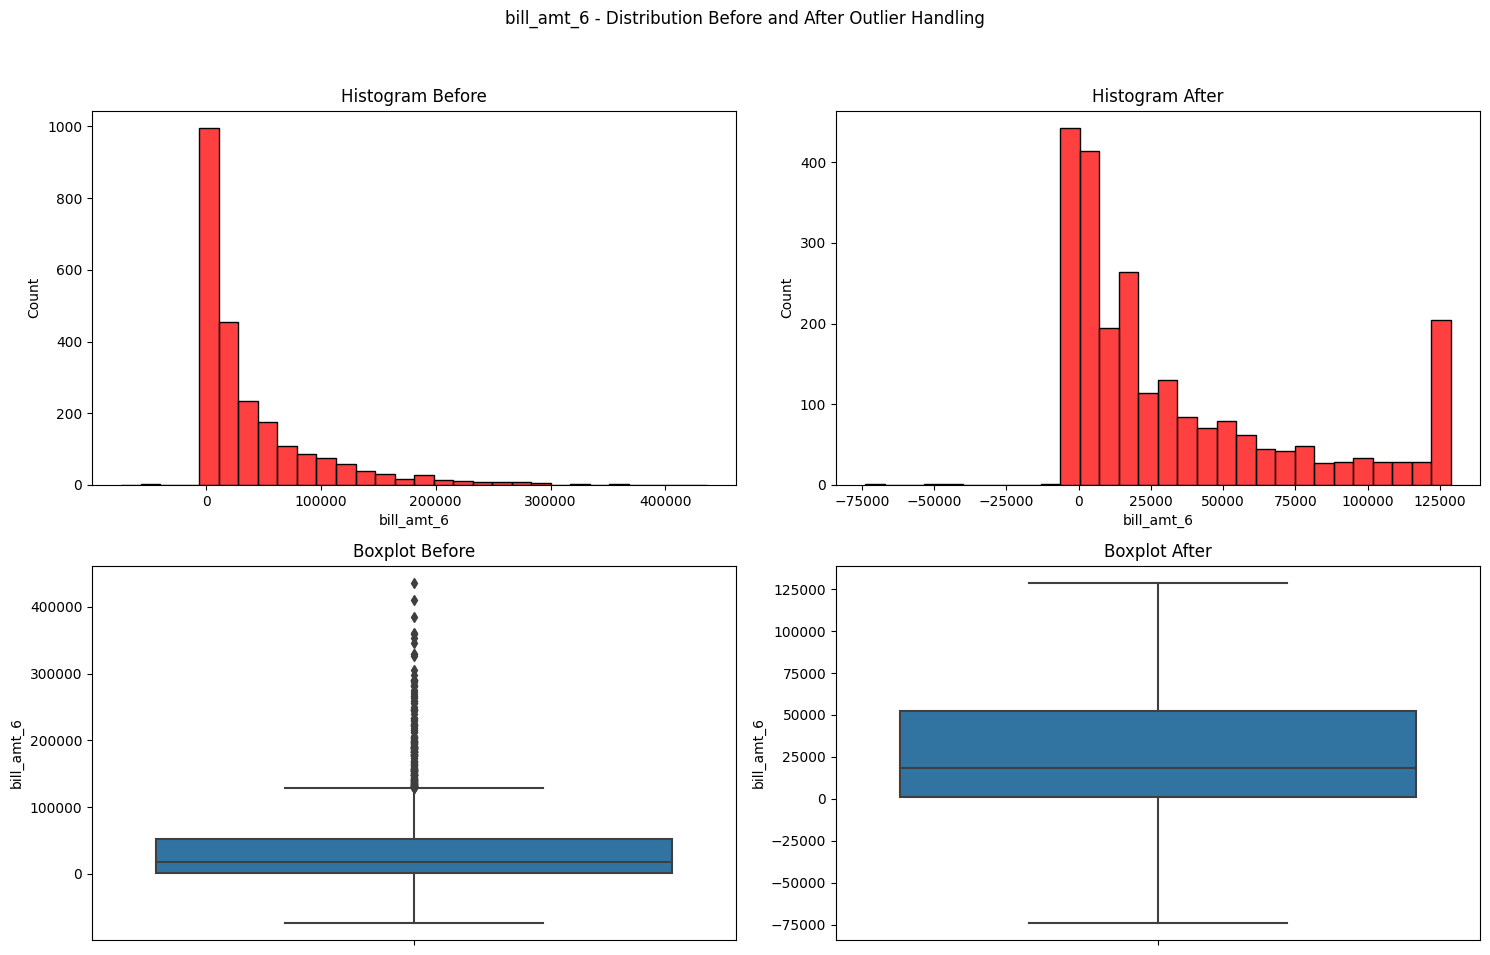

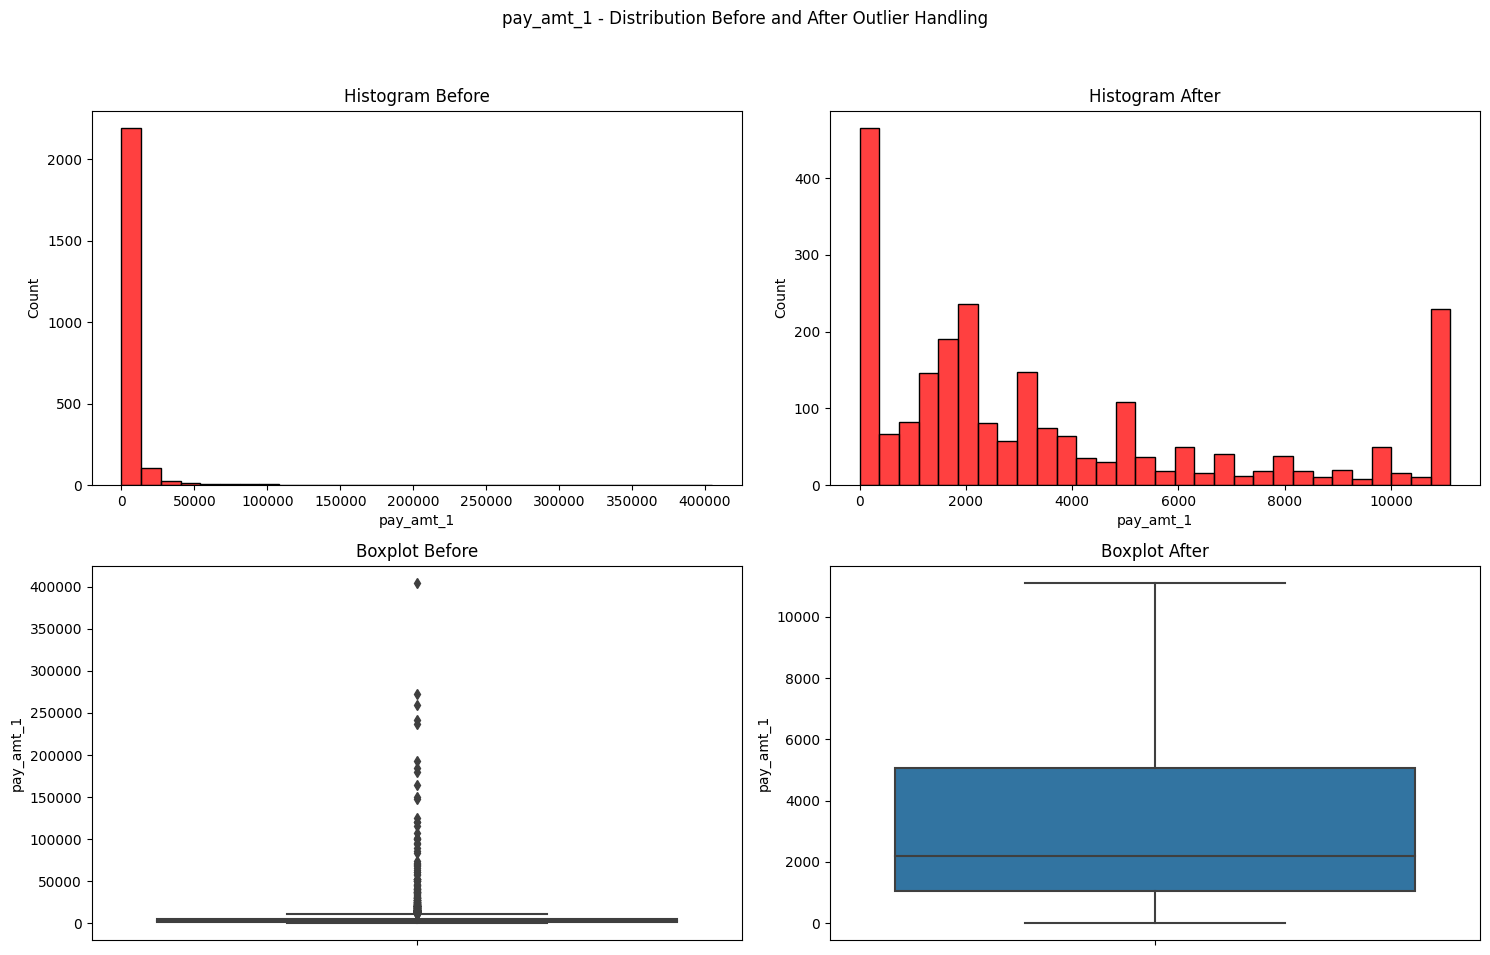

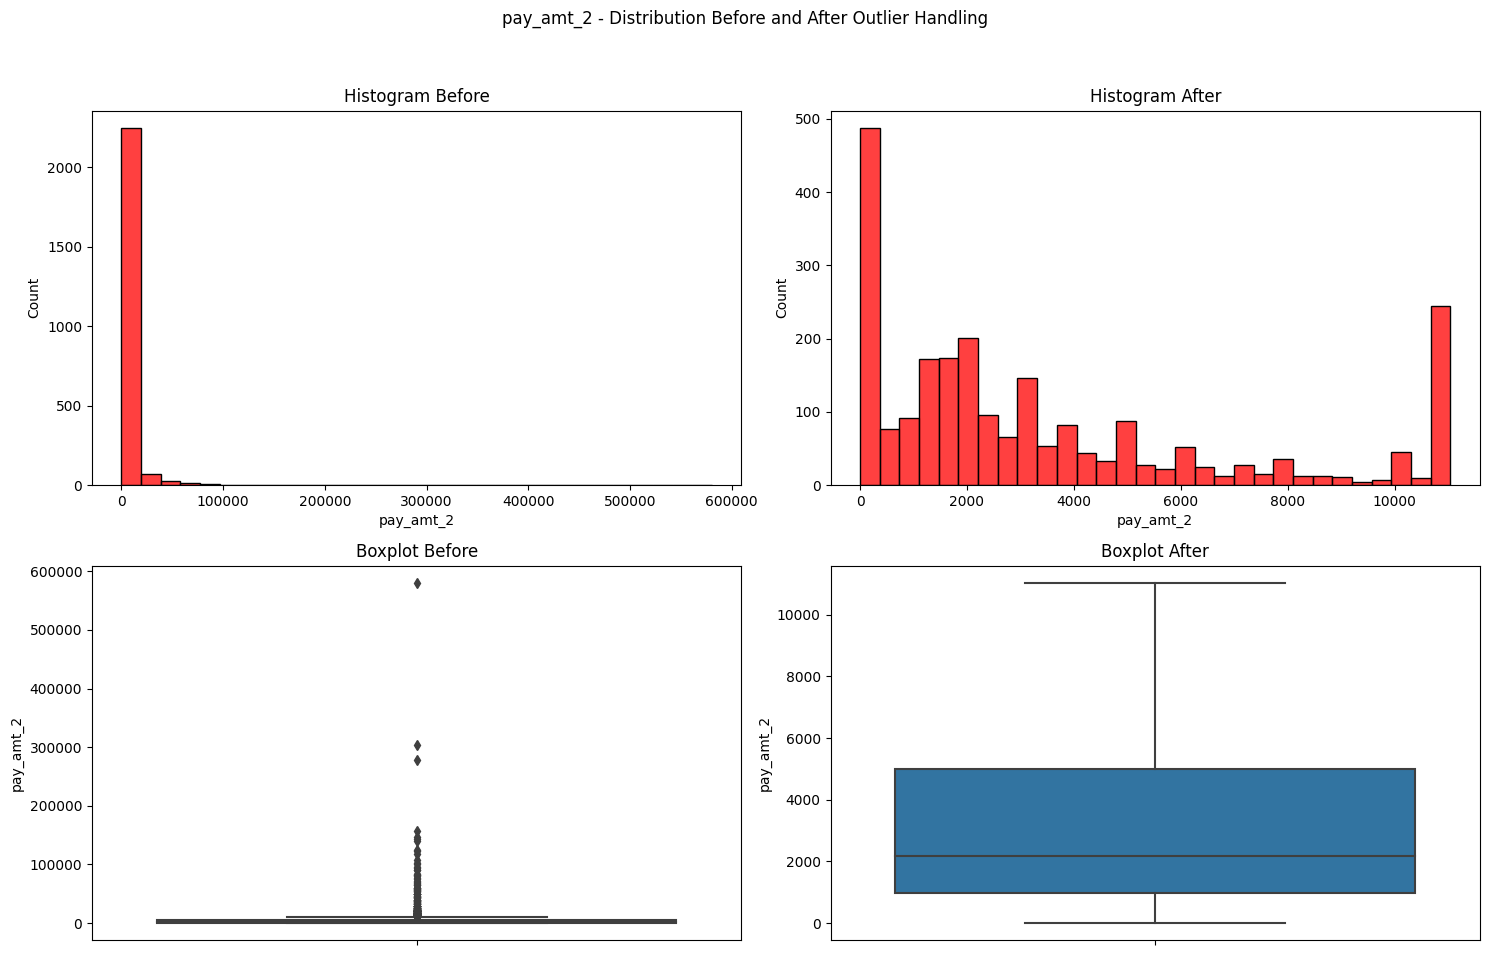

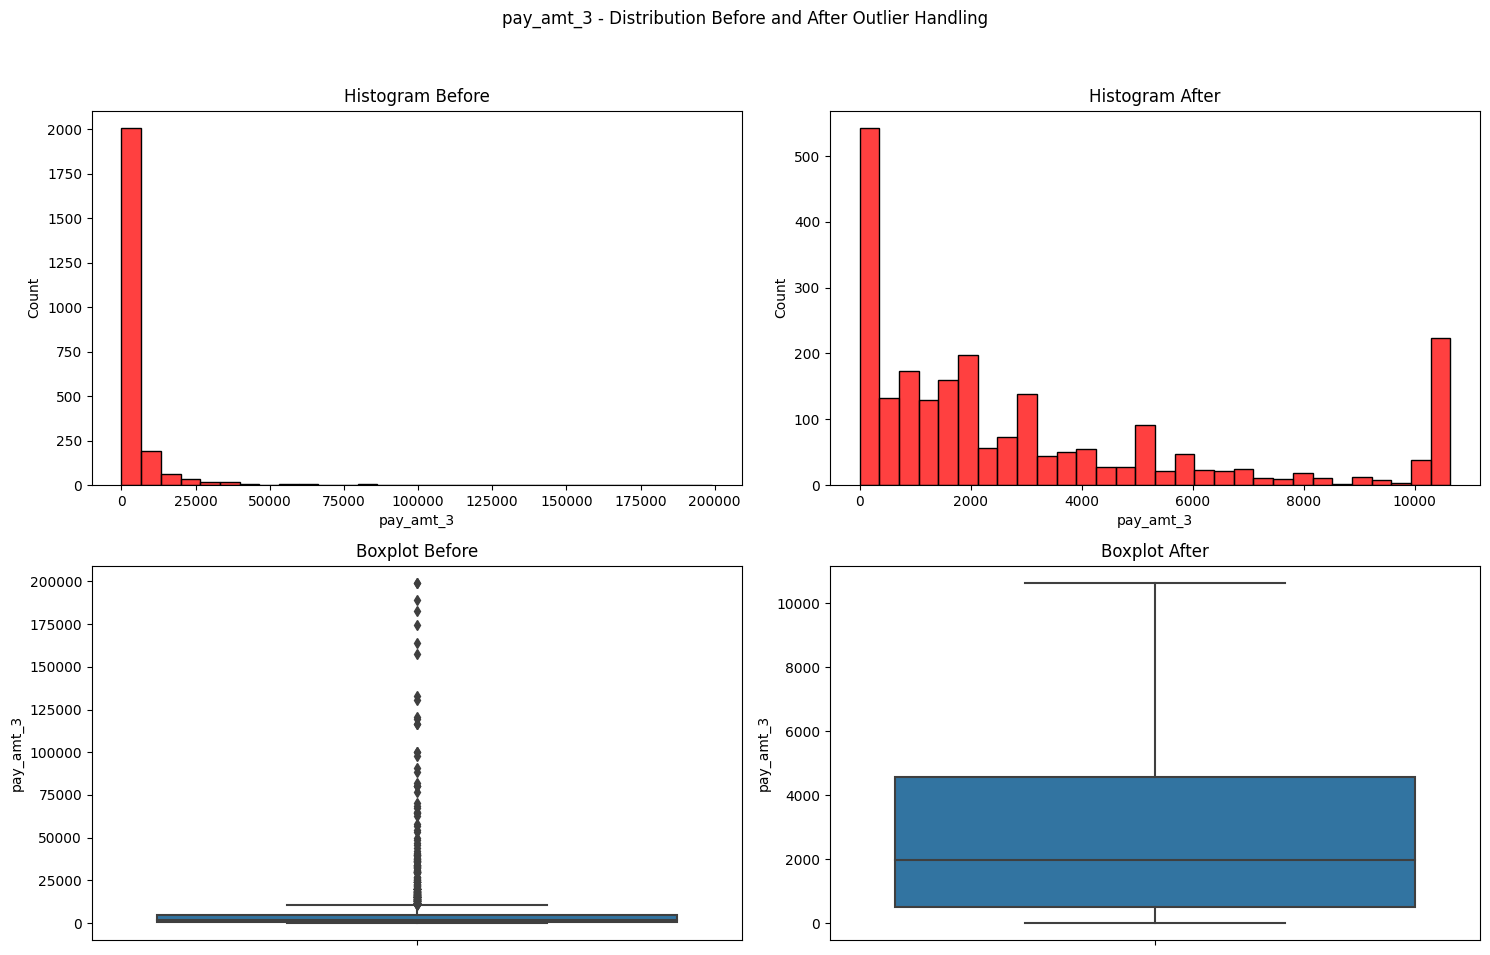

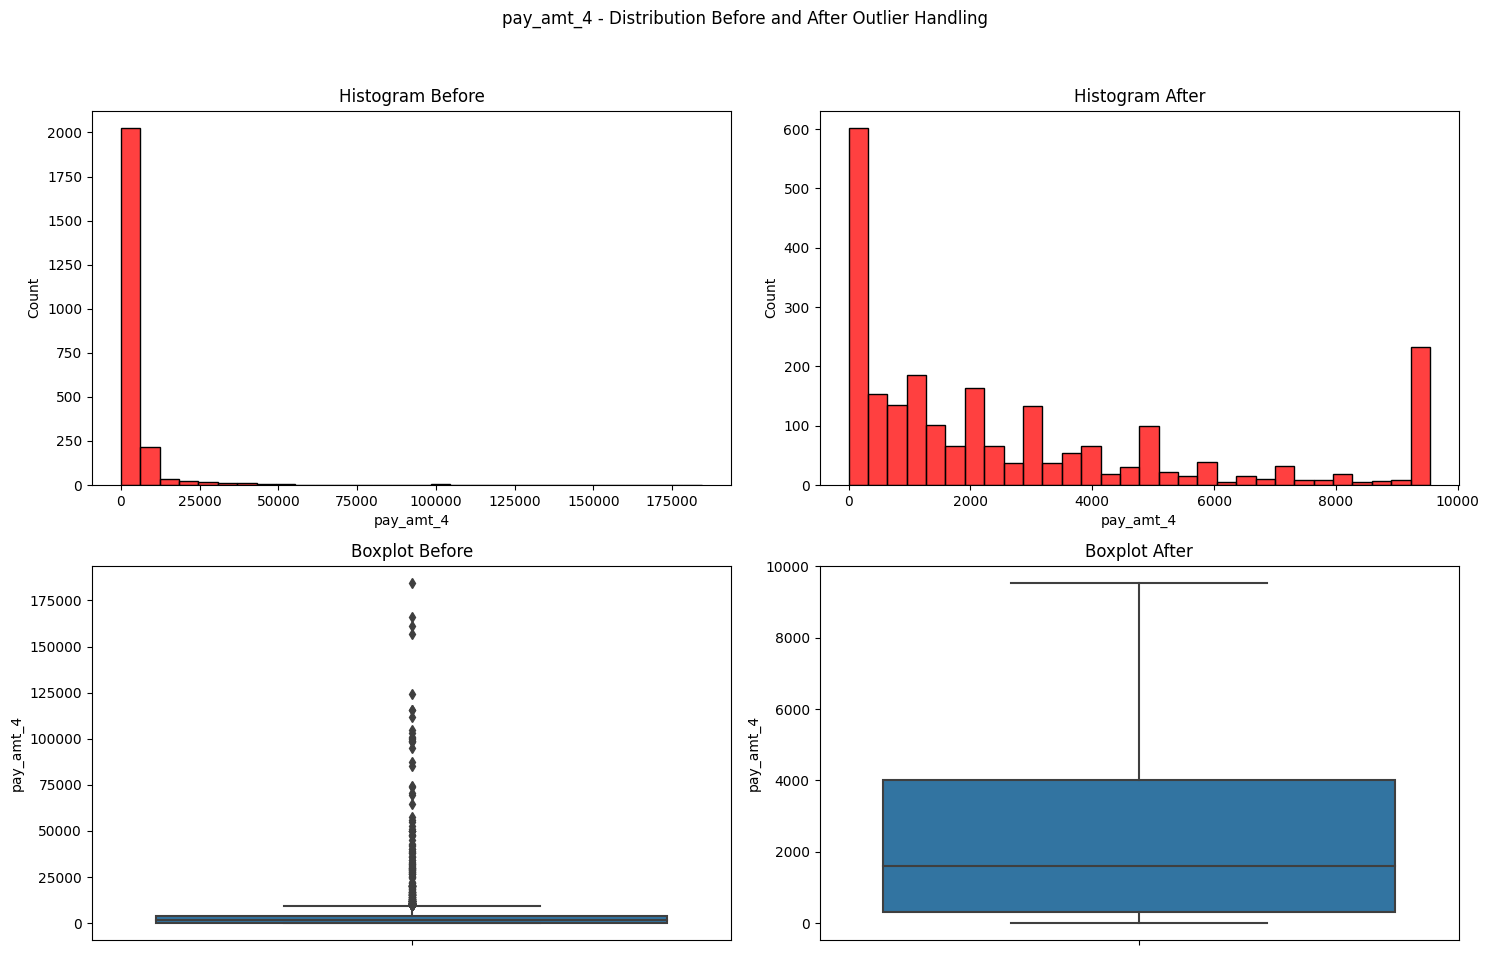

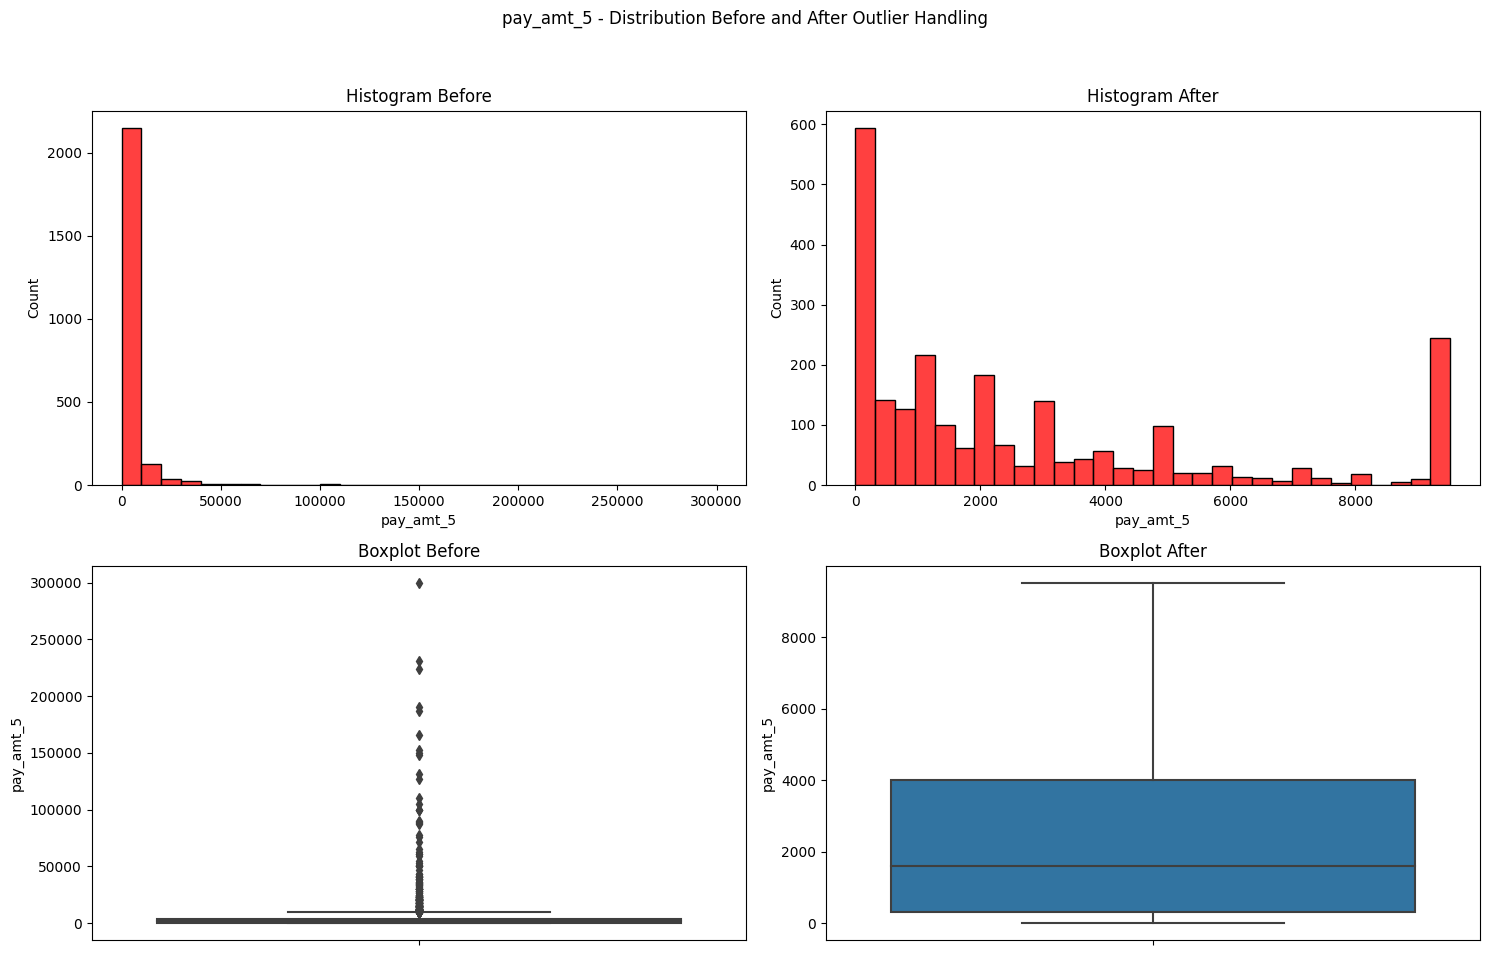

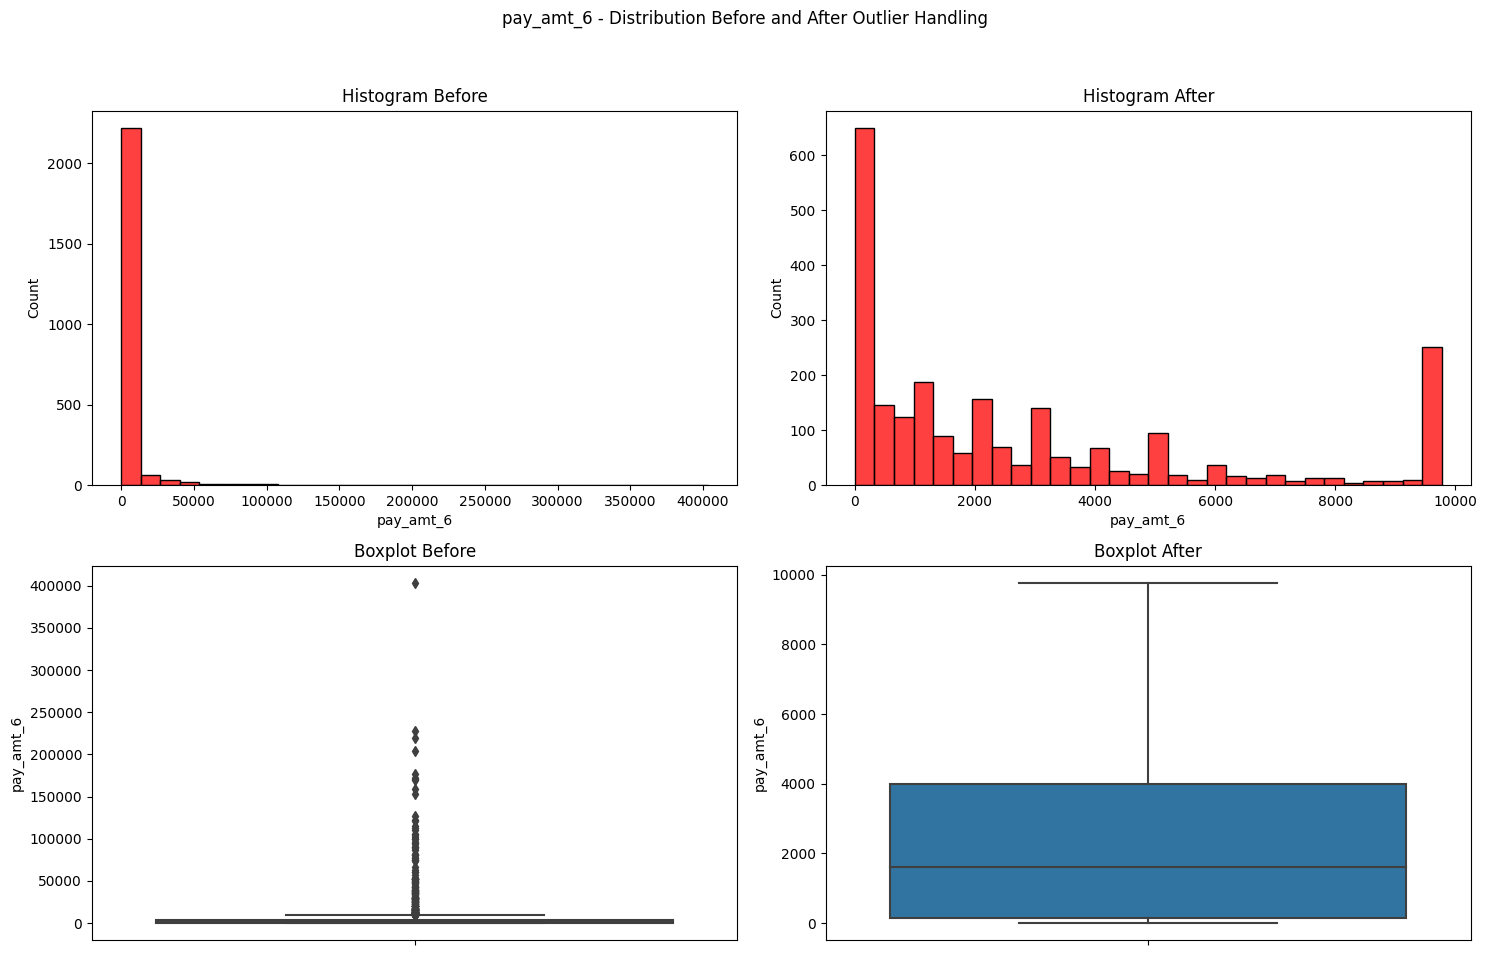

In [36]:
# Looping utk menampilkan data
for num in X_train:
    outlier_handling_plot_comparison(X_train, X_train_capped, num)

**Penjelasan**  
* Dari visualisasi terbukti jika pada kolom `pay_4`, `pay_5`, `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5` `bill_amt_6`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, `pay_amt_6` data memiliki nilai outlier didalamnya.
* Untuk membatasi nilai outlier tanpa mengurangi jumlah data, handling outlier dengan metode *capping* akan dilakukan.
* Proses akan dilanjutkan dengan proses *capping*.

## Handling Missing Value


In [37]:
# Menghitung jumlah nilai null dalam X_train_capped
X_train_capped.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [38]:
# Menghitung jumlah nilai null dalam X_test_capped
X_test_capped.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [39]:
# Menghitung jumlah nilai null dalam y_train
y_train.isnull().sum()

0

In [40]:
# Menghitung jumlah nilai null dalam y_test
y_test.isnull().sum()

0

## Feature Selection


Karena data semuanya bersifat numerik, kita tidak akan menggunakan **korelasi kendall**. Kita akan menggunakan **korelasi pearson** untuk kolom yang terdistribusi normal, dan **korelasi spearman** untuk kolom yang terdistribusi miring.


In [41]:
# Mencari korelasi antara kolom numerik dan 'price' menggunakan korelasi pearsonr dan spearmanr
p_values = []
interpretation = []
cols = []
corr = []
selected_cols = []

for col in X_train_capped.columns:
  if abs(X_train_capped[col].skew()) < 0.5:                    
    # Untuk kolom normally distributed
    corr_coef, p_value = pearsonr(X_train_capped[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:                                                     
    # Untuk kolom skew
    corr_coef, p_value = spearmanr(X_train_capped[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,limit_balance,-0.181255,5.844860e-19,Significant
1,sex,-0.021787,2.889369e-01,Not Significant
2,education_level,0.061950,2.545937e-03,Significant
3,marital_status,-0.016337,4.265470e-01,Not Significant
4,age,0.002805,8.914113e-01,Not Significant
5,pay_0,0.336906,5.105296e-64,Significant
6,pay_2,0.268144,2.508292e-40,Significant
7,pay_3,0.258068,2.218690e-37,Significant
8,pay_4,0.243455,2.480257e-33,Significant
9,pay_5,0.241039,1.092458e-32,Significant


* Didapati bahwa pada kolom  `limit_balance`, `education_level`,`pay_0`,`pay_2`,`pay_3`,`pay_4`,`pay_5`,`pay_6`,`pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, `pay_amt_6` memiliki korelasi yang signifikan. Fitur - fitur ini akan dimasukkan kedalam model.

In [42]:
# Mencetak kolom yang dipilih
print(selected_cols)

['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Daftar di atas menunjukkan kolom-kolom yang dipilih yang memiliki **korelasi signifikan** terhadap `default_payment_next_month`


Sekarang kita dapat memperbarui X Train dan X Test dengan hanya menggunakan kolom-kolom yang dipilih sebagai fitur

In [43]:
# Update fitur yg sudah dipilih
X_train = X_train_capped[selected_cols]
X_test = X_test_capped[selected_cols]

# Menampilkan X_train
X_train.head()

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2271,290000.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1318.0,1317.0,1493.0,1495.00,1657.00,9774.25
1682,50000.0,3.0,0.0,0.0,0.0,0.0,0.0,-2.0,1652.0,1906.0,1000.0,0.00,0.00,0.00
2689,80000.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,2991.0,1500.0,1608.0,1453.00,4287.00,6000.00
111,170000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3200.0,6000.0,5000.0,9541.75,9520.75,780.00
463,80000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3300.0,2602.0,1800.00,1432.00,1520.00


Data di atas menunjukkan 5 data pertama dari fitur-fitur yang dipilih

## Feature Scaling

In [44]:
# Scalling menggunakan MinMaxScaller
scaler = MinMaxScaler()
scaler.fit(X_train)

# Melakukan transformasi scaling pada X_train dan X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menampilkan X_train yang sudah di scalling
X_train_scaled

array([[0.54368932, 0.28571429, 0.28571429, ..., 0.15667985, 0.17404091,
        1.        ],
       [0.0776699 , 0.85714286, 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [0.13592233, 0.28571429, 0.28571429, ..., 0.15227815, 0.45027965,
        0.61385784],
       ...,
       [0.01941748, 0.85714286, 1.        , ..., 0.15720387, 0.07352362,
        0.29669796],
       [0.13592233, 0.28571429, 0.85714286, ..., 0.        , 0.        ,
        0.26569814],
       [0.03883495, 0.85714286, 0.        , ..., 1.        , 0.44208702,
        1.        ]])

## Feature Encoding

Karena data **tidak memiliki kolom kategorikal** (tipe data objek), maka **tidak ada kolom yang perlu di-encode**.


## Concatenate

**Penjelasan**  
Karena tidak ada data yang perlu di-encode, kita tidak perlu menggabungkan kolom. Kita bisa langsung **menggunakan X train yang telah di-scale sebagai X train final**.


In [45]:
# Concate
X_train_final = np.concatenate([X_train_scaled], axis = 1)
X_test_final = np.concatenate([X_test_scaled], axis = 1)

# Transform menjadi dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [46]:
# Menampikan X_train_final
X_train_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.543689,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.118549,0.119296,0.140254,0.156680,0.174041,1.000000
1,0.077670,0.857143,0.571429,0.571429,0.571429,0.571429,0.571429,0.000000,0.148591,0.172649,0.093941,0.000000,0.000000,0.000000
2,0.135922,0.285714,0.285714,0.285714,0.285714,0.285714,0.000000,0.285714,0.269029,0.135873,0.151057,0.152278,0.450280,0.613858
3,0.310680,0.285714,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.287828,0.543491,0.469704,1.000000,1.000000,0.079802
4,0.135922,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.269839,0.298920,0.244434,0.188645,0.150408,0.155511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0.582524,0.571429,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.109465,1.000000,0.168718,0.202898,0.058399,1.000000
2367,0.330097,0.857143,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.035619,0.035870,0.037201,0.041502,0.041593,0.040515
2368,0.019417,0.857143,1.000000,0.571429,0.571429,0.571429,0.571429,0.571429,0.138157,0.144931,0.150305,0.157204,0.073524,0.296698
2369,0.135922,0.285714,0.857143,0.285714,1.000000,0.285714,0.571429,0.571429,0.209845,0.000000,0.486801,0.000000,0.000000,0.265698


In [47]:
# Menampilkan X_test_final
X_test_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.388350,0.285714,0.285714,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.601942,0.285714,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.899463,0.380443,1.000000,0.000734,0.315101,0.000000
2,0.000000,0.571429,0.571429,0.285714,0.571429,0.571429,0.571429,0.571429,0.667311,0.126814,0.093941,0.052401,0.052517,0.051155
3,0.543689,0.571429,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.619820,0.088770,0.381306,0.259177,0.349972,0.327698
4,0.524272,0.285714,0.285714,1.000000,1.000000,0.285714,0.571429,0.571429,0.000000,0.000000,0.040395,0.000000,0.057769,0.133412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.601942,0.285714,0.571429,0.571429,0.571429,0.571429,0.571429,0.285714,0.491556,0.284155,0.004885,0.249849,1.000000,1.000000
589,0.233010,0.571429,0.285714,1.000000,1.000000,1.000000,0.285714,0.285714,0.035079,0.000000,0.000000,0.081746,0.000000,0.000000
590,0.368932,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218569,0.000000,0.037482,0.146304,0.000000,0.000000
591,0.155340,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.269839,0.112321,0.114608,0.104803,0.052517,0.081848


**Penjelasan**  
* Data final telah berhasil didapatkan 
* Proses akan dilanjutkan ke proses permodelan 

# vii. Model Definition


Pada data ini, permodelan yang akan digunakan adalah permodelan menggunakan *Logistic Regression*, SVC, dan KNN. Ketiga model ini digunakan untuk memprediksi bagaimana default_payment_next_month dari customer apakah mereka membayar atau tidak. Tujuan dari membuat tiga model ini juga untuk membandingkan manakah model dengan fitting yang terbaik diantara ketiganya. Berikut ini kelebihan tiap jenis algoritma yang akan digunakan
* Logistic regression : Regresi logistik mudah diinterpretasikan karena koefisien regresi memberikan informasi tentang hubungan antara fitur dan target, serta efisien pada dataset linier dan sensitif terhadap fitur yang relevan.
* SVC : SVM efektif dalam ruang fitur berdimensi tinggi dan menangani data yang tidak linier dengan baik menggunakan fungsi kernel, serta memiliki parameter penalti yang dapat disesuaikan untuk fleksibilitas dalam menangani data yang bervariasi.
* KNN : KNN sederhana dan mudah dipahami, cocok sebagai baseline dalam pemodelan, non-parametrik sehingga tidak terbatas pada distribusi tertentu, dan dapat digunakan tanpa proses pelatihan, membuatnya cepat dan cocok untuk pembaruan data teratur.

Untuk Hyperparameter ketiga algoritma akan memakai hyperparameter berikut :
* Logistic Regression : 
    1. C = kekuatan regulasi
    2. Solver = Algoritma untuk optimisasi problem pada LogReg
    3. Penalty = penggunaan regulasi L1 atau L2
* SVC : 
    1. C = invers dari kekuatan regulasi
    2. Kernel = Kernel yang digunakan pada SVC
* KNN : 
    1. n_neighbors = Jumlah n-neighbour
    2. p = jarak antar poin data 
    3. weights = berat tiap neighbour untuk membuat prediksi

Pada ketiga model metric yang akan dilihat adalah recall. Default payment next month adalah kolom yang melihat apakah pada bulan depan nasabah tersebut tidak dapat membayar (1) atau dapat membayar (0) tagihan kredit. Dari penjelasan kolom ini, kita harus mengurangin nilai dimana orang yang seharusnya dianggap tidak dapat membayar (1) salah diprediksi menjadi dapat membayar(0), kessalahan ini fata karena jika dibiarkan orang yang seharusnnya kartu kreditnya sudah diputus tetap dapat menggunakan kartu tersebut. Dari sini artinya kit harus melihat FN dengan menggunakan `metric Recall`
 


In [48]:
# Mengdefine Algorithm
logReg = LogisticRegression()
model_svc = SVC()
knn = KNeighborsClassifier()

# viii. Model Training

In [49]:
# Fitting logreg pada model 
logReg.fit(X_train_final,y_train)

LogisticRegression()

In [50]:
# Fitting logreg pada model 
model_svc.fit(X_train_final,y_train)

SVC()

In [51]:
# Fitting KNN pada model 
knn.fit(X_train_final,y_train)


KNeighborsClassifier()

**Penjelasan**  
* Ketiga model telah berhasil di train pada model. Karena pelatihan sudah dilakukan, proses akan dilanjutkan ke evaluasi dari model sendiri. Evaluasi model akan dilakukan per tiap jenis metode fitting yang digunakan.

# ix. Model Evaluation

Model yang akan dievaluasi dibagi menjadi 3, yaitu evaluasi model Logreg, evaluasi model SVC, dan evaluasi dari model KNN. Evaluasi yang dilakukan akan melihat nilai dari precision, recall, accurary, dan nilai F1 dari tiap model. Untuk mengevaluasi hal tersebut akan digunakan fungsi dibawah ini.

In [52]:
# Fungsi untuk evaluasi dari ketiga model
all_reports = {}
def performance_report(all_reports, y_train, y_train_pred, y_test, y_test_pred, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_pred),
      'train - recall' : recall_score(y_train, y_train_pred),
      'train - accuracy' : accuracy_score(y_train, y_train_pred),
      'train - f1_score' : f1_score(y_train, y_train_pred),
      'test - precision' : precision_score(y_test, y_test_pred),
      'test - recall' : recall_score(y_test, y_test_pred),
      'test - accuracy_score' : accuracy_score(y_test, y_test_pred),
      'test - f1_score' : f1_score(y_test, y_test_pred),
  }
  all_reports[name] = score_reports
  return all_reports

**Penjelasan**  
* Fungsi untuk evaluasi dari ketiga data telah berhasil dimasukkan. Proses evaluasi untuk tiap model siap untuk dilakukan.

## Evaluasi Model Logistic Regression

Pengujian untuk model dengan fitting menggunakan Logistic Regression.

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1873
           1       0.71      0.30      0.42       498

    accuracy                           0.83      2371
   macro avg       0.78      0.63      0.66      2371
weighted avg       0.81      0.83      0.80      2371



<Figure size 700x700 with 0 Axes>

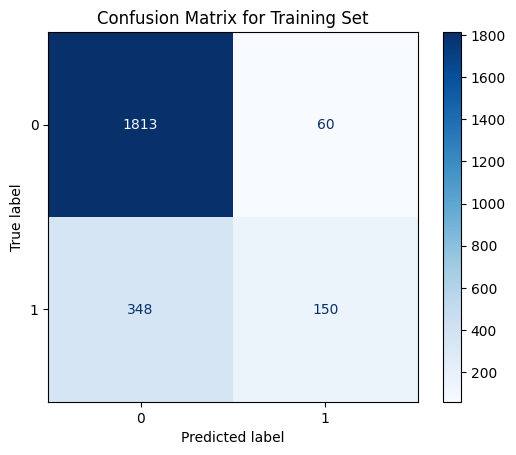

---------------------------------------------------------------------------------------------------------------

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       456
           1       0.71      0.33      0.45       137

    accuracy                           0.81       593
   macro avg       0.77      0.64      0.67       593
weighted avg       0.80      0.81      0.79       593



<Figure size 700x700 with 0 Axes>

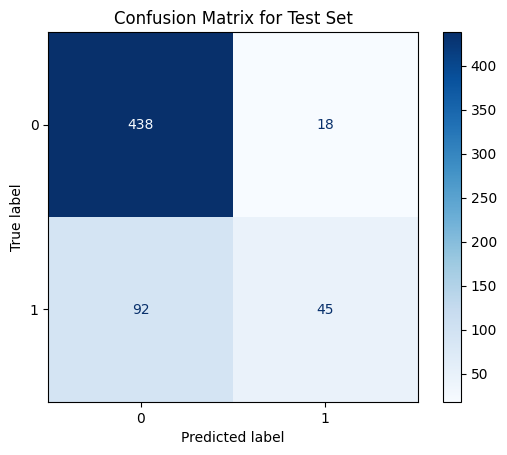

---------------------------------------------------------------------------------------------------------------



In [53]:
# Menghitung prediksi untuk set pelatihan dan pengujian
y_train_pred = logReg.predict(X_train_final)
y_test_pred = logReg.predict(X_test_final)

# Menghasilkan laporan klasifikasi untuk set pelatihan dan pengujian
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Menghitung confusion matrix untuk set pelatihan dan pengujian
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix untuk set pelatihan dan pengujian
train_conf_matrix_display = ConfusionMatrixDisplay(train_conf_matrix)
test_conf_matrix_display = ConfusionMatrixDisplay(test_conf_matrix)

# Mencetak laporan klasifikasi untuk set pelatihan
print("Classification Report for Training Set:\n", train_classification_report)

# Menampilkan confusion matrix dan laporan klasifikasi untuk set pelatihan
plt.figure(figsize=(7, 7))
train_conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set')
plt.show()
print('---------------------------------------------------------------------------------------------------------------')
print('')
print("Classification Report for Test Set:\n", test_classification_report)

# Menampilkan confusion matrix dan laporan klasifikasi untuk set pengujian
plt.figure(figsize=(7, 7))
test_conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()
print('---------------------------------------------------------------------------------------------------------------')
print('')

# Simpan Laporan Klasifikasi ke dalam Dictionary
all_reports = performance_report(all_reports, y_train, y_train_pred, y_test, y_test_pred, 'Manual LogReg')

**Penjelasan**  
Berdasarkan hasil evaluasi SVM didapatkan :
* Pada train didapatkan nilai `TP`, `FP`, `TN`, `FN` sebesar `150`, `60`, `1813`, `348`
* Pada test didapatkan nilai `TP`, `FP`, `TN`, `FN` sebesar `45`, `18`, `438`, `92`
* Nilai evaluasi yang akan menjadi fokus adalah nilai false negative. Hal ini dikarenakan customer yang dianggap tidak akan membayar kredit harus benar dan tidak boleh dianggap masih membayar agar kartu dapat diblokir. Karena itu nilai yang akan difokuskan adalah jumlah FN yaitu dengan melihat nilai recall dari algoritma
* `Recall train` sebesar `0.30` dan `recall test` sebesar `0.33`

## Evaluasi Model SVC

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1873
           1       0.77      0.43      0.55       498

    accuracy                           0.85      2371
   macro avg       0.82      0.70      0.73      2371
weighted avg       0.84      0.85      0.84      2371



<Figure size 700x700 with 0 Axes>

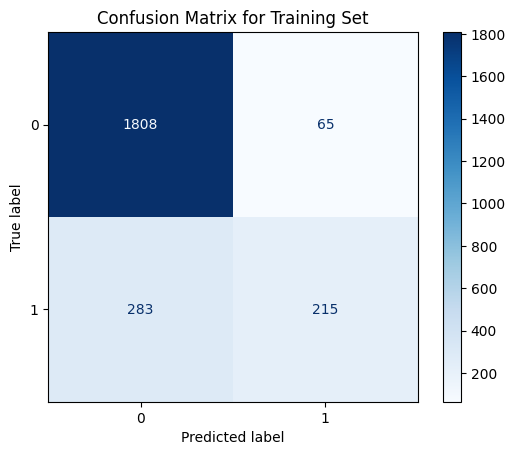

---------------------------------------------------------------------------------------------------------------

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       456
           1       0.63      0.34      0.44       137

    accuracy                           0.80       593
   macro avg       0.73      0.64      0.66       593
weighted avg       0.78      0.80      0.78       593



<Figure size 700x700 with 0 Axes>

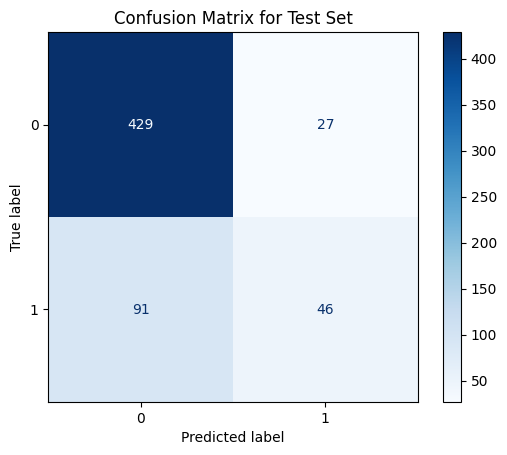

---------------------------------------------------------------------------------------------------------------



In [54]:
# Menghitung prediksi untuk set pelatihan dan pengujian
y_train_pred = model_svc.predict(X_train_final)
y_test_pred = model_svc.predict(X_test_final)

# Menghasilkan laporan klasifikasi untuk set pelatihan dan pengujian
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Menghitung confusion matrix untuk set pelatihan dan pengujian
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix untuk set pelatihan dan pengujian
train_conf_matrix_display = ConfusionMatrixDisplay(train_conf_matrix)
test_conf_matrix_display = ConfusionMatrixDisplay(test_conf_matrix)

# Mencetak laporan klasifikasi untuk set pelatihan
print("Classification Report for Training Set:\n", train_classification_report)

# Menampilkan confusion matrix dan laporan klasifikasi untuk set pelatihan
plt.figure(figsize=(7, 7))
train_conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set')
plt.show()

print('---------------------------------------------------------------------------------------------------------------')
print('')

print("Classification Report for Test Set:\n", test_classification_report)

# Menampilkan confusion matrix dan laporan klasifikasi untuk set pengujian
plt.figure(figsize=(7, 7))
test_conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()

print('---------------------------------------------------------------------------------------------------------------')
print('')

# Simpan Laporan Klasifikasi ke dalam Dictionary
all_reports = performance_report(all_reports, y_train, y_train_pred, y_test, y_test_pred, 'Manual SVC')


**Penjelasan**  
Berdasarkan hasil evaluasi SVC didapatkan :
* Pada train didapatkan nilai `TP`, `FP`, `TN`, `FN` sebesar `215`, `65`, `1`, `283`
* Pada test didapatkan nilai `TP`, `FP`, `TN`, `FN` sebesar `46`, `27`, `429`, `91`
* Nilai evaluasi yang akan menjadi fokus adalah nilai false negative. Hal ini dikarenakan customer yang dianggap tidak akan membayar kredit harus benar dan tidak boleh dianggap masih membayar agar kartu dapat diblokir. Karena itu nilai yang akan difokuskan adalah jumlah FN yaitu dengan melihat nilai recall dari algoritma
* `Recall train` sebesar `0.43` dan `recall test` sebesar `0.34`

## Evaluasi Model KNN

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1873
           1       0.74      0.48      0.58       498

    accuracy                           0.86      2371
   macro avg       0.81      0.72      0.75      2371
weighted avg       0.85      0.86      0.84      2371



<Figure size 700x700 with 0 Axes>

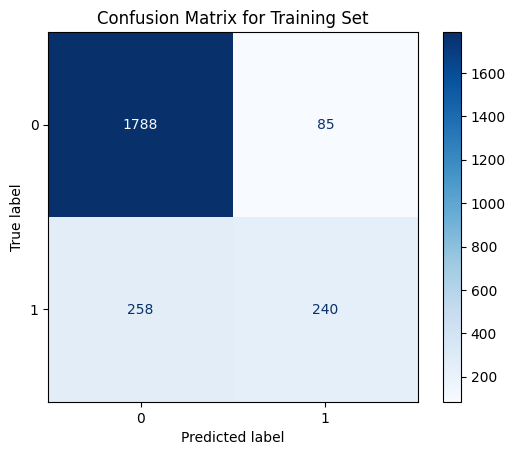

---------------------------------------------------------------------------------------------------------------

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86       456
           1       0.53      0.31      0.39       137

    accuracy                           0.78       593
   macro avg       0.67      0.62      0.63       593
weighted avg       0.75      0.78      0.76       593



<Figure size 700x700 with 0 Axes>

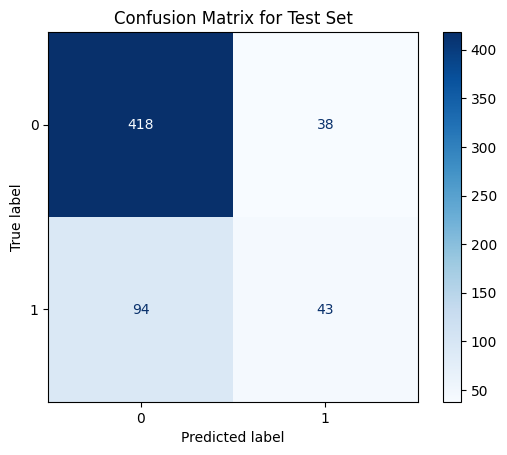


---------------------------------------------------------------------------------------------------------------



In [55]:
# Menghitung prediksi untuk set pelatihan dan pengujian
y_train_pred = knn.predict(X_train_final)
y_test_pred = knn.predict(X_test_final)

# Menghasilkan laporan klasifikasi untuk set pelatihan dan pengujian
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Menghitung confusion matrix untuk set pelatihan dan pengujian
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix untuk set pelatihan dan pengujian
train_conf_matrix_display = ConfusionMatrixDisplay(train_conf_matrix)
test_conf_matrix_display = ConfusionMatrixDisplay(test_conf_matrix)

print("Classification Report for Training Set:\n", train_classification_report)

# Menampilkan confusion matrix dan laporan klasifikasi untuk set pelatihan
plt.figure(figsize=(7, 7))
train_conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set')
plt.show()

print('---------------------------------------------------------------------------------------------------------------')
print('')
print("Classification Report for Test Set:\n", test_classification_report)

# Menampilkan confusion matrix dan laporan klasifikasi untuk set pengujian
plt.figure(figsize=(7, 7))
test_conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()

print('')
print('---------------------------------------------------------------------------------------------------------------')
print('')

# Simpan Laporan Klasifikasi ke dalam Dictionary
all_reports = performance_report(all_reports, y_train, y_train_pred, y_test, y_test_pred, 'Manual KNN')

Berdasarkan hasil evaluasi KNN didapatkan :
* Pada train didapatkan nilai `TP`, `FP`, `TN`, `FN` sebesar `206`, `85`, `1788`, `258`
* Pada test didapatkan nilai `TP`, `FP`, `TN`, `FN` sebesar `43`, `38`, `418`, `94`
* Nilai evaluasi yang akan menjadi fokus adalah nilai false negative. Hal ini dikarenakan customer yang dianggap tidak akan membayar kredit harus benar dan tidak boleh dianggap masih membayar agar kartu dapat diblokir. Karena itu nilai yang akan difokuskan adalah jumlah FN yaitu dengan melihat nilai recall dari algoritma
* `Recall train` sebesar `0.48` dan `recall test` sebesar `0.31`

## Analisis Hasil Evaluasi Model

In [56]:
pd.DataFrame(all_reports)

,Manual LogReg,Manual SVC,Manual KNN
train - precision,0.714286,0.767857,0.738462
train - recall,0.301205,0.431727,0.481928
train - accuracy,0.827921,0.853226,0.855335
train - f1_score,0.423729,0.552699,0.583232
test - precision,0.714286,0.630137,0.530864
test - recall,0.328467,0.335766,0.313869
test - accuracy_score,0.814503,0.801012,0.777403
test - f1_score,0.450000,0.438095,0.394495


**Penjelasan**  
* `Recall` dari ketiga model sebesar :
    1. Logreg : train = 0.301205, test = 0.328467
    2. SVC : train = 0.481928, test = 0.313869
    3. KNN : train = 0.431727, test = 0.335766
* Dari ketiga model tanpa tuning, yaitu model dengan nilai fitting berdasarkan metric yang digunakan yaiu recall. Model terbaik adalah model LogReg. Akan tetapi sebelum dapat disimpulkan bahwa model ini adalah model yang terbaik, akan dilakukan hypertuning untuk melihat apakah performa dari ketiga model ini masih dapat ditingkatkan

## Hyperparameter Tuning


**Penjelasan**  
Proses tuning hyperparameter dari ketiga jenis algoritma. Jenis tuning yang akan digunakan adalah metode random search, metode ini digunakan karena tuning dengan metode ini tidak membutuhkan kekuatan komputasi yang terlalu besar dan relatif lebih cepat untuk diproses karena jumlah data terujinya dapat diatur

### Tuning LogReg


Tuning LogReg akan digunakan untuk mencari nilai terbaik pada hyperparameter C, penalty, dan solver.

In [57]:
# Hyperparameter tuning menggunakan random search untuk LogReg
# Mendefinisikan parameter grid
param_grid = {
    'C': uniform(loc=0, scale=100),
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
}

# Membuat objek RandomizedSearchCV
LogReg_search = RandomizedSearchCV(estimator=logReg,
                                    param_distributions=param_grid,
                                    n_iter=100, cv=5, 
                                    random_state=42)

# Perform random search
LogReg_search.fit(X_train_final, y_train)

# Print best hyperparameters
print("Best hyperparameters found:")
print(LogReg_search.best_params_)

# Evaluate best model
LogReg_best_model = LogReg_search.best_estimator_
accuracy = LogReg_best_model.score(X_test_final, y_test)
print("Accuracy of the best model:", accuracy)

all_reports = performance_report(all_reports, y_train, y_train_pred, y_test, y_test_pred, 'Tuning Logreg')


Best hyperparameters found:
{'C': 0.6952130531190703, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy of the best model: 0.8145025295109612


**Penjelasan**  
* Dari hasil tuning dari logreg didapatkan bahwa untuk nilai C yang diuji dari nilai 0 - 100 didapatkan nilai terbaik C = 0.6952130531190703.
* Dari hasil tuning dari logreg didapatkan bahwa untuk nilai penalty yang terbaik adalah menggunakan regulasi L2.
* Dari hasil tuning dari logreg didapatkan bahwa untuk nilai solver adalah lbfgs

Parameter terbaik dari ketiganya adalah :
```{'C': 0.6952130531190703, 'penalty': 'l2', 'solver': 'lbfgs'}``` dengan akurasi model sebesar `0.8145025295109612`. Nilai hyperparameter ini akan dimasukkan kedalam permodelan data.


F1 Score - Test Set   :  0.4198581560283688 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1873
           1       0.71      0.30      0.42       498

    accuracy                           0.83      2371
   macro avg       0.78      0.63      0.66      2371
weighted avg       0.81      0.83      0.80      2371
 

Confusion Matrix      : 


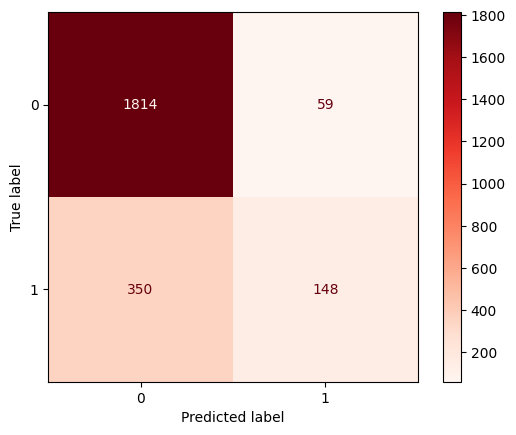

In [58]:
# Cek performance Model terhadap Train-set
y_pred_train = LogReg_best_model.predict(X_train_final)

print('F1 Score - Test Set   : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(LogReg_best_model, X_train_final, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.45 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       456
           1       0.71      0.33      0.45       137

    accuracy                           0.81       593
   macro avg       0.77      0.64      0.67       593
weighted avg       0.80      0.81      0.79       593
 

Confusion Matrix      : 


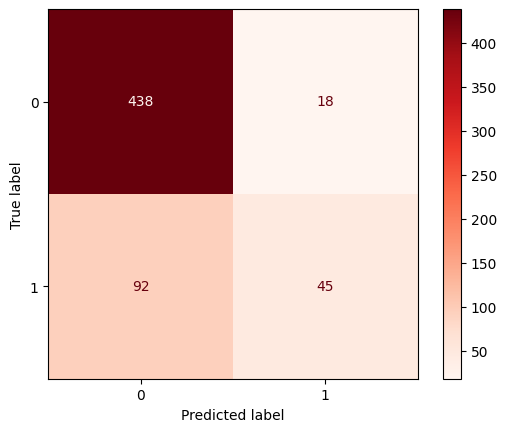

In [59]:
# Cek performance Model terhadap Test-Set

y_pred_test = LogReg_best_model.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(LogReg_best_model, X_test_final, y_test, cmap='Reds'))

**Penjelasan**  
* Berdasarkan hasil test-set dan train-set LogReg setelah tuning didapatkan nilai recall untuk default payment bernilai 1 pada`train` dan `test` secara berurut sebesar `0.30`dan `0,33`

### Tuning SVC


Tuning SVC akan dilakukan untuk mencari nilai terbaik pada hyperparameter C dan  fungsi kernel yang akan digunakan

In [60]:
# Create SVC model
svm = SVC()

# Define parameter grid
param_grid = {
    'C': [0.1,1,10,100],  # Range for regularization parameter C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel functions to consider
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm,
                                    param_distributions=param_grid, 
                                    n_iter=10, cv=5, 
                                    random_state=42)

# Perform random search
random_search.fit(X_train_final, y_train)

# Print best hyperparameters
print("Best hyperparameters found:")
print(random_search.best_params_)

# Evaluate best model
SVM_best_model = random_search.best_estimator_
accuracy = SVM_best_model.score(X_test_final, y_test)
print("Accuracy of the best model:", accuracy)

all_reports = performance_report(all_reports, y_train, y_train_pred, y_test, y_test_pred, 'Tuning SVC')

Best hyperparameters found:
{'kernel': 'poly', 'C': 0.1}
Accuracy of the best model: 0.7993254637436762


**Penjelasan**  
* Berdasarkan hasil tuning, jenis kernel yang terbaik untuk digunakan adalah tipe `poly`
* Berdasarkan hasil tuning, niali C terbaik adalah `C = 0.1`

Nilai hyperparameter terbaik untuk SVC adalah `{kernel = poly, C=0.1}` dengan akurasi model bernilai `0.7993254637436762`. Nilai hyperparameter ini akan dimasukkan kedalam permodelan data.

F1 Score - Test Set   :  0.5433673469387755 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1873
           1       0.74      0.43      0.54       498

    accuracy                           0.85      2371
   macro avg       0.80      0.69      0.73      2371
weighted avg       0.84      0.85      0.83      2371
 

Confusion Matrix      : 


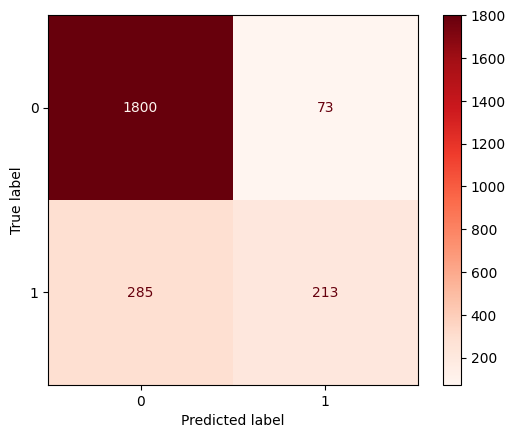

In [61]:
# Cek performance Model terhadap Train-set
y_pred_train = SVM_best_model.predict(X_train_final)

print('F1 Score - Test Set   : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(SVM_best_model, X_train_final, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.43601895734597157 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       456
           1       0.62      0.34      0.44       137

    accuracy                           0.80       593
   macro avg       0.72      0.64      0.66       593
weighted avg       0.78      0.80      0.78       593
 

Confusion Matrix      : 


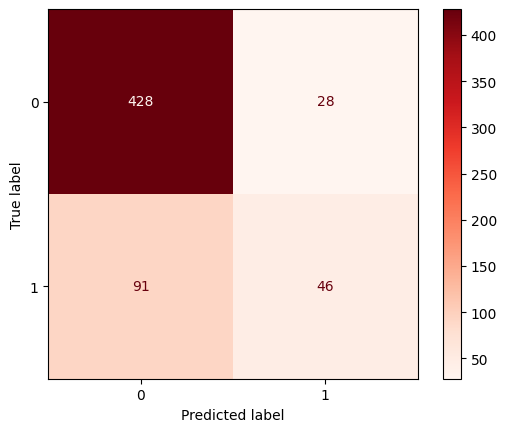

In [62]:
# Cek performance Model against Test-set
y_pred_test = SVM_best_model.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(SVM_best_model, X_test_final, y_test, cmap='Reds'))

**Penjelasan**  
* Berdasarkan hasil test-set dan train-set SVM setelah tuning didapatkan nilai recall untuk default payment bernilai 1 pada`train` dan `test` secara berurut sebesar `0.43`dan `0,34`

### Tuning KNN


Tuning KKN akan dilakukan untuk mencari nilai terbaik untuk hyperparameter jumlah neighbords, weight fuction, dan nilai p

In [63]:
# Create KNN model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': randint(1, 50),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for the Minkowski metric
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=knn,
                                   param_distributions=param_grid,
                                   n_iter=50,  # Number of iterations
                                   cv=5,
                                   random_state=42)

# Perform random search
random_search.fit(X_train_final, y_train)

# Print best hyperparameters
print("Best hyperparameters found:")
print(random_search.best_params_)

# Evaluate best model
KNN_best_model = random_search.best_estimator_
accuracy = KNN_best_model.score(X_test_final, y_test)
print("Accuracy of the best model:", accuracy)

all_reports = performance_report(all_reports, y_train, y_train_pred, y_test, y_test_pred, 'Tuning KNN')

Best hyperparameters found:
{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Accuracy of the best model: 0.7993254637436762


**Penjelasan**  
* Berdasarkan hasil tuning, nilai n_neighbor terbaik adalah `9`
* Berdasarkan hasil tuning, nilai p terbaik adalah `2`
* Berdasarkan hasil tuhning, nilai weight terbaik adalah weight jenis `uniform`

Nilai hyperparameter terbaik untuk KNN adalah `{n_neighbor = 9, p=2, weight = uniform}` dengan akurasi model `0.7993254637436762`. Nilai hyperparameter ini akan dimasukkan kedalam permodelan data.

F1 Score - Test Set   :  0.5278137128072445 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1873
           1       0.74      0.41      0.53       498

    accuracy                           0.85      2371
   macro avg       0.80      0.69      0.72      2371
weighted avg       0.83      0.85      0.83      2371
 

Confusion Matrix      : 


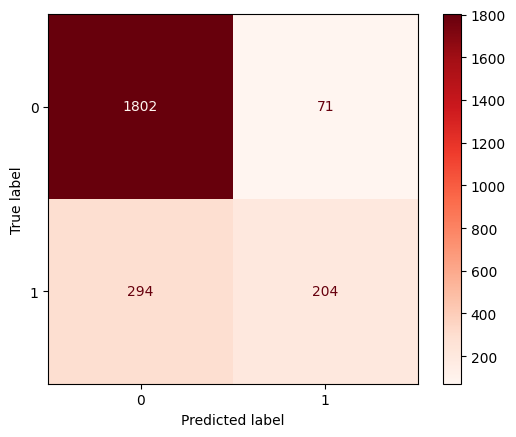

In [64]:
# Memeriksa performa model terhadap Train-set
y_pred_train = KNN_best_model.predict(X_train_final)

print('F1 Score - Test Set   : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(KNN_best_model, X_train_final, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.43601895734597157 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       456
           1       0.62      0.34      0.44       137

    accuracy                           0.80       593
   macro avg       0.72      0.64      0.66       593
weighted avg       0.78      0.80      0.78       593
 

Confusion Matrix      : 


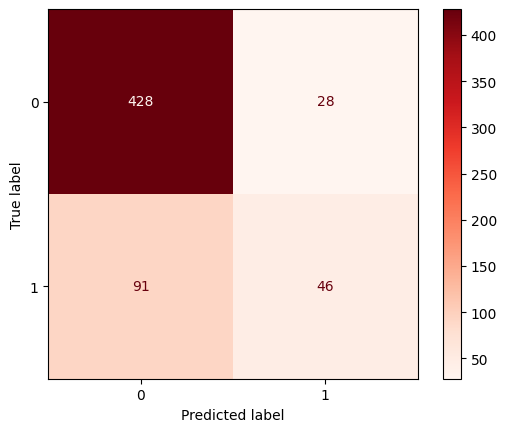

In [65]:
# Memeriksa performa model terhadap Test-set
y_pred_test = SVM_best_model.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(SVM_best_model, X_test_final, y_test, cmap='Reds'))

* Berdasarkan hasil test-set dan train-set KNN setelah tuning didapatkan nilai recall untuk default payment bernilai 1 pada `train` dan `test` secara berurut sebesar `0.41`dan `0,34`

### Analisa Hasil Tuning

**Penjelasan**  
* `Recall` dari ketiga model sebesar :
    1. Logreg : train = 0.30, test = 0.33
    2. SVC : train = 0.43, test = 0.34
    3. KNN : train = 0.41, test = 0.34
* Dari ketiga model dengan tuning. Model terbaik adalah model KNN. Model ini memiliki perbedaan train dan test yang sangat kecil dengan nilai recall yang sama dengan logreg. Jika dibandingkan dengan model logreg tanpa tuning, model ini memiliki recall yang lebih baik sehingga dapat disimpulkan bahwa model KNN tuning adalah model terbaik yang akan diuji

# x. Model Saving

Penyimpanan data model yang akan digunakan 

In [66]:
with open('list_selected_cols.txt', 'w') as file_1:
  json.dump(selected_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('KNN_best.pkl', 'wb') as file_3:
  pickle.dump(KNN_best_model, file_3)


# xi. Model Inference

Pengujian model dengan data random

## Load Model

In [67]:
# Load model dan file-file lain

with open('list_selected_cols.txt', 'r') as file_1:
  selected_cols = json.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = pickle.load(file_2)

with open("KNN_best.pkl", "rb") as file_3:
  model = pickle.load(file_3)

* Data Berhasil diload

## Random Data

In [68]:
# Generate random data
num_rows = 5  # number of rows
dataFrame = {
    'limit_balance': np.random.randint(5000, 100000, num_rows),
    'sex': np.random.choice([1, 2], num_rows),
    'education_level': np.random.choice([1, 2, 3 ,4], num_rows),
    'marital_status': np.random.choice([1,2,3,0], num_rows),
    'age': np.random.randint(18, 70, num_rows),
    'pay_0': np.random.randint(-2, 8, num_rows),
    'pay_2': np.random.randint(-2, 8, num_rows),
    'pay_3': np.random.randint(-2, 8, num_rows),
    'pay_4': np.random.randint(-2, 8, num_rows),
    'pay_5': np.random.randint(-2, 8, num_rows),
    'pay_6': np.random.randint(-2, 8, num_rows),
    'bill_amt_1': np.random.randint(0, 100000, num_rows),
    'bill_amt_2': np.random.randint(0, 100000, num_rows),
    'bill_amt_3': np.random.randint(0, 100000, num_rows),
    'bill_amt_4': np.random.randint(0, 100000, num_rows),
    'bill_amt_5': np.random.randint(0, 100000, num_rows),
    'bill_amt_6': np.random.randint(0, 100000, num_rows),
    'pay_amt_1': np.random.randint(0, 30000, num_rows),
    'pay_amt_2': np.random.randint(0, 30000, num_rows),
    'pay_amt_3': np.random.randint(0, 30000, num_rows),
    'pay_amt_4': np.random.randint(0, 30000, num_rows),
    'pay_amt_5': np.random.randint(0, 30000, num_rows),
    'pay_amt_6': np.random.randint(0, 30000, num_rows),
    # 'default_payment_next_month': np.random.choice([0, 1], num_rows)
}

# Create DataFrame
random_data = pd.DataFrame(dataFrame)

# Menampilkan hasil
random_data.head().T

,0,1,2,3,4
limit_balance,92972,74763,39856,33415,38736
sex,1,1,2,1,1
education_level,4,3,1,4,3
marital_status,0,0,2,1,2
age,62,36,44,25,22
pay_0,-2,6,4,4,4
pay_2,-1,1,2,4,7
pay_3,0,4,3,-2,1
pay_4,-2,5,3,5,5
pay_5,2,0,7,6,-2


In [69]:
# Memilih kolom yang dipilih dari data inferensi
data_inference_num = random_data[selected_cols]

In [70]:
# Melakukan transformasi scaling pada data inferensi
data_inference_num_scaled = scaler.transform(data_inference_num)
data_inference_num_scaled

array([[0.16111068, 1.14285714, 0.        , 0.28571429, 0.57142857,
        0.        , 1.14285714, 0.85714286, 1.60257246, 0.30353948,
        1.81719117, 2.1543218 , 0.36310165, 1.22587411],
       [0.1257534 , 0.85714286, 2.28571429, 0.85714286, 1.71428571,
        2.        , 0.57142857, 2.        , 1.58593241, 2.5765982 ,
        1.1703147 , 2.82600152, 2.2017173 , 3.01445124],
       [0.05797282, 0.28571429, 1.71428571, 1.14285714, 1.42857143,
        1.42857143, 2.57142857, 1.14285714, 2.41721571, 0.00860527,
        1.98496947, 1.60609951, 0.46719008, 1.6577231 ],
       [0.04546602, 1.14285714, 1.71428571, 1.71428571, 0.        ,
        2.        , 2.28571429, 2.        , 0.34899148, 2.51654249,
        1.50436825, 1.16163178, 0.53651235, 1.73455764],
       [0.05579806, 0.85714286, 1.71428571, 2.57142857, 0.85714286,
        2.        , 0.        , 2.57142857, 2.32196263, 1.05292239,
        1.21324566, 1.30196243, 1.67014153, 2.19883879]])

## Concatenate

In [71]:
# Menggabungkan data inferensi yang telah di-scale menjadi satu array final
data_inference_final = np.concatenate([data_inference_num_scaled], axis = 1)
data_inference_final

array([[0.16111068, 1.14285714, 0.        , 0.28571429, 0.57142857,
        0.        , 1.14285714, 0.85714286, 1.60257246, 0.30353948,
        1.81719117, 2.1543218 , 0.36310165, 1.22587411],
       [0.1257534 , 0.85714286, 2.28571429, 0.85714286, 1.71428571,
        2.        , 0.57142857, 2.        , 1.58593241, 2.5765982 ,
        1.1703147 , 2.82600152, 2.2017173 , 3.01445124],
       [0.05797282, 0.28571429, 1.71428571, 1.14285714, 1.42857143,
        1.42857143, 2.57142857, 1.14285714, 2.41721571, 0.00860527,
        1.98496947, 1.60609951, 0.46719008, 1.6577231 ],
       [0.04546602, 1.14285714, 1.71428571, 1.71428571, 0.        ,
        2.        , 2.28571429, 2.        , 0.34899148, 2.51654249,
        1.50436825, 1.16163178, 0.53651235, 1.73455764],
       [0.05579806, 0.85714286, 1.71428571, 2.57142857, 0.85714286,
        2.        , 0.        , 2.57142857, 2.32196263, 1.05292239,
        1.21324566, 1.30196243, 1.67014153, 2.19883879]])

In [72]:
# Melakukan prediksi pada data inferensi menggunakan model yang telah dilatih
y_pred_inference = model.predict(data_inference_final)
y_pred_inference

array([0, 1, 1, 1, 1], dtype=int64)

Kesimpulan prediksi dibawah ini dapat berubah karna data inference di generate secara random

* Berdasarkan hasil prediksi didapat bahwa dari data kolom 1 nasabah tidak dapat membayar kredit, untuk kolom 2 dapat membayar kredit, dst. Dari sini diketahui bahwa model berhasil membuat prediksi berdasarkan data yang diberikan 

# xii. Pengambilan Kesimpulan

## Kesimpulan EDA
Berdasarkan EDA didapat kesimpulan sebagai berikut :

* Sehubungan dengan histogram grafik `default_payment_next_month` terhadap semua kolom kategorikal, dapat disimpulkan bahwa asumsi sementara adalah bahwa variabel `education_level`, `pay_0`,`pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6` memiliki korelasi dengan `default_payment_next_month`. Sementara itu, untuk variabel sex dan marital_status masih tidak dapat disimpulkan apapun. Untuk mendapatkan tingkat korelasi yang lebih tepat, perlu dilakukan uji korelasi pada saat proses data engineering. Hal ini bertujuan untuk memastikan bahwa fitur yang digunakan lebih akurat dalam menghasilkan prediksi pada model.

* Dari heatmap korelasi seluruh data numerikal, dapat dilihat bahwa seluruh kolom numerikal tidak memiliki korelasi yang kuat. Korelasi terbesar ditemukan pada hubungan antara `pay_amt_1` dan `pay_amt_2`, dengan nilai korelasi sebesar 0.43. Hal ini menunjukkan bahwa ada hubungan lemah antara kedua variabel tersebut, di mana jumlah pembayaran orang pada `pay_amt_1` berbanding lurus dengan jumlah pembayaran pada `pay_amt_2`.

## Rekomendasi Model
Rekomendasi yang dapat diberikan berdasarkan hasil evaluasi dari model ini:

* Model prediksi `default_payment_next_month` menggunakan algoritma KNN yang telah disesuaikan dapat memprediksi status pembayaran default payment. Namun, tingkat akurasi dalam menginterpretasikan nilai false negative masih rendah dibandingkan nilai optimal. Hal ini disebabkan beberapa faktor, salah satunya adalah outlier. Untuk mengatasi outlier, pada model ini digunakan metode capping yang hanya membatasi nilai outlier tanpa menghapusnya. Namun, batasan yang diberikan masih tinggi sehingga dapat memengaruhi pembacaan pola oleh model. Untuk mencegah outlier, dapat dilakukan metode handling lain seperti cutting, yaitu menghapus langsung nilai data outlier. Selain capping, faktor lain yang dapat mempengaruhi adalah adanya data 1 atau 2 contoh pada kolom sex. Model seperti LogReg tidak dapat membaca nilai ordinal, dan nilai pada kolom sex dapat mempengaruhi nilai recall dari model logreg. Untuk mengatasi hal ini, dapat dilakukan perubahan atau diencode ulang nilai kolom sex menggunakan hot encoder.

## Rekomendasi bisnis
Rekomendasi bisnis yang dapat diberikan berdasarkan model :

1. **Optimasi Limit Kredit**
   - Berdasarkan analisis korelasi, faktor-faktor seperti `limit_balance` memiliki pengaruh signifikan terhadap `default_payment_next_month`. Oleh karena itu, tinjau kembali kebijakan pemberian limit kredit. Pertimbangkan untuk mengurangi limit kredit bagi pelanggan yang menunjukkan risiko tinggi berdasarkan analisis data historis.

2. **Program Edukasi dan Literasi Keuangan**
   - Melihat pentingnya faktor-faktor seperti `education_level` dan `age`, perusahaan dapat menyelenggarakan program edukasi dan literasi keuangan yang ditargetkan. Ini akan membantu pelanggan memahami pentingnya manajemen keuangan yang baik dan dapat mengurangi tingkat gagal bayar.

3. **Segmentasi Pelanggan yang Lebih Tepat**
   - Dengan menggunakan model klasifikasi, perusahaan dapat membuat segmentasi pelanggan yang lebih tepat berdasarkan risiko gagal bayar. Segmentasi ini bisa digunakan untuk menawarkan produk yang lebih sesuai dengan profil risiko masing-masing segmen.

4. **Penerapan Teknologi AI untuk Deteksi Dini Risiko**
   - Implementasikan sistem berbasis AI untuk mendeteksi dini pelanggan yang berisiko tinggi melakukan default. Sistem ini dapat memberikan peringatan dini kepada tim manajemen resiko sehingga tindakan preventif dapat diambil lebih awal.

5. **Pengembangan Produk Khusus untuk Pelanggan Berisiko Tinggi**
   - Kembangkan produk keuangan khusus yang dirancang untuk pelanggan dengan risiko tinggi. Misalnya, produk dengan bunga lebih tinggi tetapi dengan limit kredit lebih rendah atau produk dengan skema pembayaran yang lebih fleksibel.

6. **Kebijakan Pembayaran yang Lebih Fleksibel**
   - Menawarkan kebijakan pembayaran yang lebih fleksibel untuk pelanggan yang berada dalam kesulitan keuangan. Hal ini dapat mencakup penjadwalan ulang pembayaran atau menawarkan rencana pembayaran yang disesuaikan dengan kemampuan pelanggan.

7. **Analisis dan Pemantauan Berkelanjutan**
   - Lakukan analisis data dan pemantauan berkelanjutan untuk terus memperbarui model resiko dan strategi mitigasi. Hal ini penting untuk beradaptasi dengan perubahan perilaku pelanggan dan kondisi ekonomi.

8. **Kolaborasi dengan Institusi Pendidikan**
   - Berkolaborasi dengan institusi pendidikan untuk memberikan literasi keuangan sejak dini, dapat membantu membentuk kebiasaan keuangan yang sehat pada generasi muda, yang akan menjadi basis pelanggan di masa depan.


# Conceptual Problems

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
    * Koefisien pada LogReg adalah nilai yang menunjukkan besar pengaruh fitur terhadap peluang kejadian yang diprediksi terjadi.
2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
    * Parameter kernel pada SVM digunakan untuk mengolah data mentah menjadi bentuk yang lebih mudah diproses. Contoh kernel yang dimengerti adalah kernel linear, yang membuat data dengan pemisahan data dengan metode linear.
3. Bagaimana cara memilih `K` yang optimal pada KNN ?
    * K optimal dapat dicari menggunakan hyperparameter tuning, seperti dengan menggunakan random search atau grid search. Tuning ini akan mencoba nilai k mulai dari 0 sampai batas tertentu yang ditentukan atau dapat juga mencari mana yang terbaik dari nilai-nilai k yang dimasukkan.
4. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya?
    * Accurary : Akurasi klasifikasi yang benar dari suatu model
    * Precision : Menghitung data prediksi positif yang benar (true positive) digunakan untuk menghitung false positive
    * Recall : Banyaknya data positif yang diprediksi model dengan benar. DIgunakan untuk menghitung false negative
    * F1 Score : rata-rata dari precision dan reall 

# Model Deployment

Aplikasi ini telah di-deploy dan dapat diakses melalui URL berikut: [huggingface](https://huggingface.co/spaces/iqbal-saputra/GC5)